## 4. Plot mAP vs relative activity for bulk and single-cell data (Figs 4C & 5A)

The perturbseq data come from the CRISPRi experiment from:

> Jost, M., Santos, D.A., Saunders, R.A. et al. Titrating gene expression using libraries of systematically attenuated CRISPR guide RNAs. Nat Biotechnol 38, 355–364 (2020). https://doi.org/10.1038/s41587-019-0387-5

and relative activity is defined as:

The fold-knockdown of each mismatched variant divided by the fold-knockdown of the perfectly-matched sgRNA.

In [1]:
import pathlib
import numpy as np
import pandas as pd
import plotnine as gg
import statsmodels.api as sm

import seaborn as sns

from map_utils.plot import set_plotting_style

In [2]:
set_plotting_style()

In [3]:
# Load perturbseq results
perturbseq_results_dir = pathlib.Path("results")

gse_id = "GSE132080"
results_file = pathlib.Path(f"{perturbseq_results_dir}/{gse_id}_map.tsv")

output_dir = "figures"

bulk_map_df = pd.read_csv(results_file, sep="\t")
bulk_map_df.loc[:, "gene"] = pd.Categorical(
    bulk_map_df.gene, categories=bulk_map_df.gene.unique()
)

print(bulk_map_df.shape)
bulk_map_df.head(2)

(128, 15)


perturbation  group       mAP   p_value  \
0  ALDOA_ALDOA_+_30077139.23-P1P2_00  ALDOA  0.701923  0.047928   
1  ALDOA_ALDOA_+_30077139.23-P1P2_06  ALDOA  0.678571  0.062910   

   corrected_p_value  below_p  p < 0.05  -log10(mAP p-value)  \
0           0.074814     True     False             1.126015   
1           0.094735    False     False             1.023490   

                            id              sequence   gene  gamma_day5  \
0  ALDOA_+_30077139.23-P1P2_00  GGTCACCAGGACCCCTTCTG  ALDOA   -0.412746   
1  ALDOA_+_30077139.23-P1P2_06  GGTCACCAGGATCCCTTCTG  ALDOA   -0.396687   

   gamma_day10  relative_activity_day5  relative_activity_day10  
0    -0.366469                1.000000                 1.000000  
1    -0.348503                0.961091                 0.950977

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 4 x 3.5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/GSE132080_crispri_map_relative_activity_comparison.png


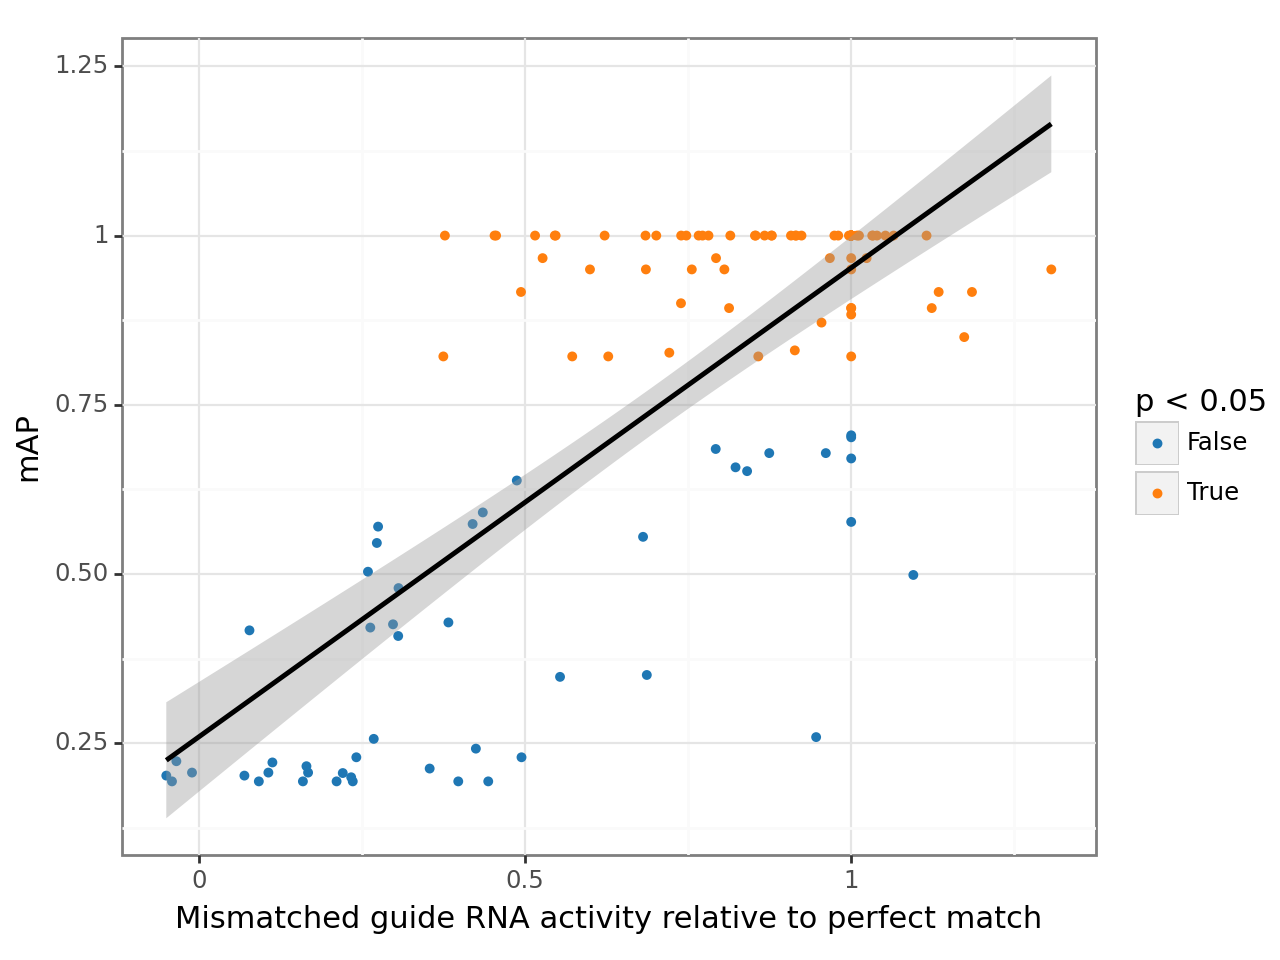

<Figure Size: (640 x 480)>

In [4]:
palette = sns.color_palette().as_hex()
color_map = {False: palette[0], True: palette[1]}


# Linear Regression Model
X = bulk_map_df["relative_activity_day5"]
Y = bulk_map_df["mAP"]
X = sm.add_constant(X)  # adding a constant for intercept

model = sm.OLS(Y, X).fit()
coef = model.params["relative_activity_day5"]
r_squared = model.rsquared

# Creating the plot
global_gg = (
    gg.ggplot(
        bulk_map_df, gg.aes(x="relative_activity_day5", y="mAP", color="p < 0.05")
    )
    + gg.geom_point(alpha=1.0, size=1)
    + gg.geom_smooth(method="lm", color="black")
    + gg.theme_bw()
    + gg.xlab("Mismatched guide RNA activity relative to perfect match")
    + gg.ylab("mAP")
    + gg.scale_color_manual(values=color_map)
)

# Specify output file path
output_file = pathlib.Path(
    f"{output_dir}/{gse_id}_crispri_map_relative_activity_comparison.png"
)

# Save the plot
global_gg.save(output_file, dpi=500, height=3.5, width=4)

# Display the plot
global_gg

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/GSE132080_crispri_map_relative_activity_comparison.png
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/guides/guide_colorbar.py:73: PlotnineWarning: colorbar guide needs continuous scales
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/guides/guide_colorbar.py:73: PlotnineWarning: colorbar guide needs continuous scales


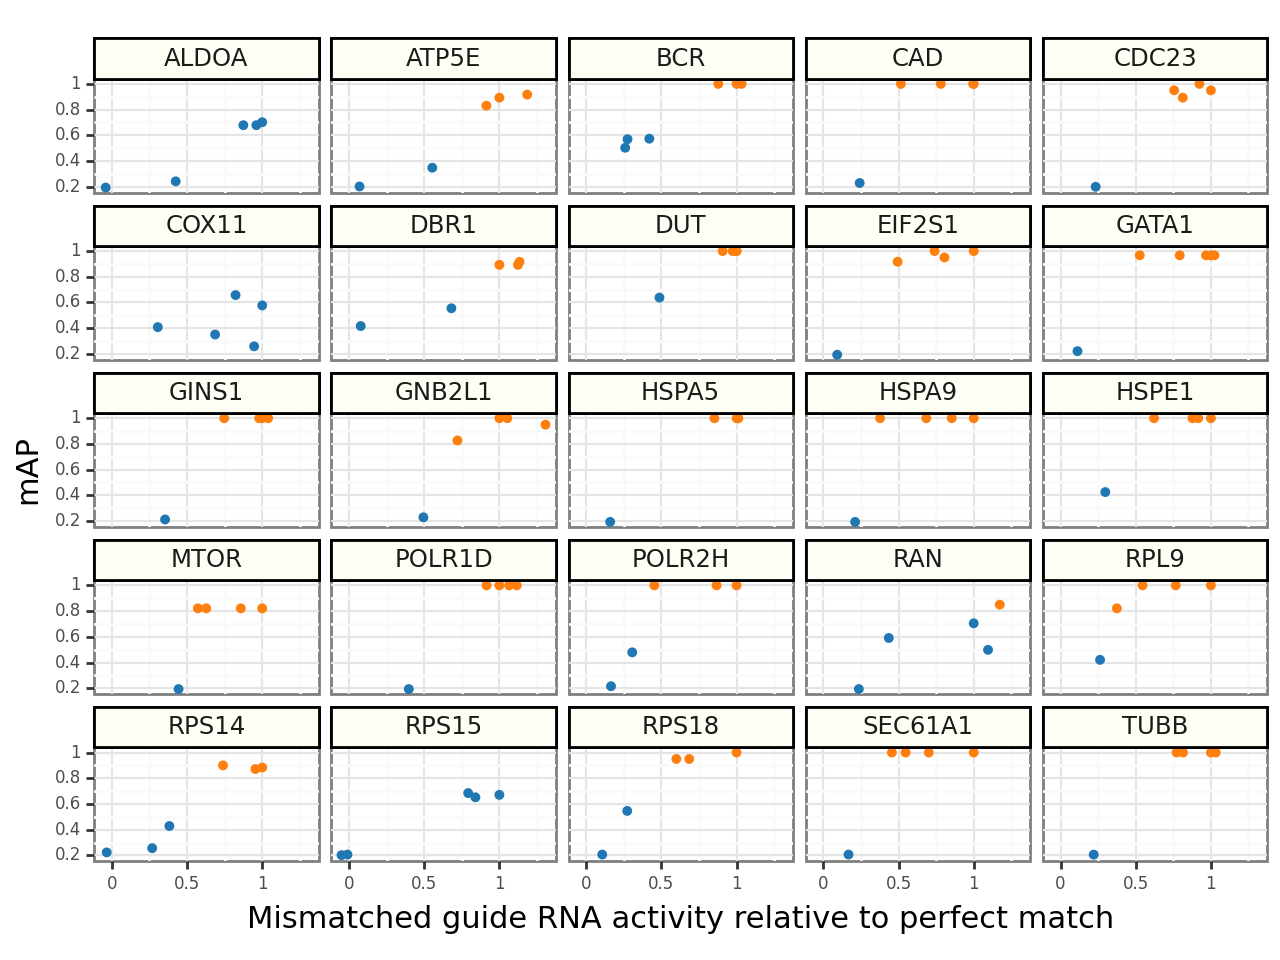

<Figure Size: (640 x 480)>

In [5]:
gene_gg = (
    gg.ggplot(
        bulk_map_df, gg.aes(x="relative_activity_day5", y="mAP", color="p < 0.05")
    )
    + gg.geom_point(size=1.0)
    + gg.theme_bw()
    + gg.xlab("Mismatched guide RNA activity relative to perfect match")
    + gg.ylab("mAP")
    + gg.scale_color_manual(values=color_map)
    + gg.guides(color=gg.guide_colorbar(title="mAP"))
    + gg.facet_wrap("~gene")
    + gg.theme(
        strip_background=gg.element_rect(colour="black", fill="#fdfff4"),
        axis_text=gg.element_text(size=6),
    )
)

output_file = pathlib.Path(
    f"{output_dir}/{gse_id}_crispri_map_relative_activity_comparison.png"
)
gene_gg.save(output_file, dpi=500, height=5, width=6)

gene_gg

## Visualize single cell AP

In [6]:
# Load perturbseq gene expression data
perturbseq_data_dir = pathlib.Path("data")

gene_exp_file = pathlib.Path(f"{perturbseq_data_dir}/{gse_id}_final_analytical.tsv.gz")

sc_gene_exp_df = pd.read_csv(gene_exp_file, sep="\t")

print(sc_gene_exp_df.shape)
sc_gene_exp_df.head()

/tmp/ipykernel_81448/2764458434.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.


(23537, 1012)


Metadata_cell_identity Metadata_cell_barcode  \
0           sc_profile_0    AAACCTGAGAGTAATC-1   
1           sc_profile_1    AAACCTGAGGGATCTG-1   
2           sc_profile_2    AAACCTGAGGTCATCT-1   
3           sc_profile_3    AAACCTGCAATGGAGC-1   
4           sc_profile_4    AAACCTGCACCAGGCT-1   

                Metadata_guide_identity  Metadata_read_count  \
0        RAN_RAN_+_131356438.23-P1P2_12                544.0   
1          neg_ctrl_non-targeting_00089                267.0   
2  POLR2H_POLR2H_+_184081251.23-P1P2_08                622.0   
3         TUBB_TUBB_+_30688126.23-P1_03                433.0   
4    CDC23_CDC23_-_137548987.23-P1P2_04                136.0   

   Metadata_UMI_count  Metadata_coverage  Metadata_gemgroup  \
0                34.0          16.000000                1.0   
1                19.0          14.052632                1.0   
2                34.0          18.294118                1.0   
3                20.0          21.650000                1.0   
4                 8.0          17.000000                1.0   

  Metadata_good_coverage  Metadata_number_of_cells Metadata_gene_identity  \
0                   True                       1.0                    RAN   
1                   True                       1.0                    neg   
2                   True                       1.0                 POLR2H   
3                   True                       1.0                   TUBB   
4                   True                       1.0                  CDC23   

   ...    YPEL4     YPEL5    ZBTB38     ZFAS1   ZFP36L1    ZNF365     ZNF43  \
0  ... -0.09309 -0.632468 -0.539091 -1.633805 -0.876912 -0.012155 -0.017763   
1  ... -0.09309 -0.632468 -0.539091  1.610220  1.322265 -0.012155 -0.017763   
2  ... -0.09309 -0.632468 -0.539091 -0.567252  0.057540 -0.012155 -0.017763   
3  ... -0.09309  1.765279 -0.539091 -1.659420 -0.876912 -0.012155 -0.017763   
4  ... -0.09309  0.686753 -0.539091  0.541260  0.934539 -0.012155 -0.017763   

     ZNF483  ZNF556       ZYX  
0 -0.026877 -0.0524 -0.452229  
1 -0.026877 -0.0524 -0.452229  
2 -0.026877 -0.0524 -0.452229  
3 -0.026877 -0.0524 -0.452229  
4 -0.026877 -0.0524  1.406718  

[5 rows x 1012 columns]

In [7]:
# Load single cell mAP results
sc_results_file = pathlib.Path(
    f"{perturbseq_results_dir}/{gse_id}_single_cell_map.tsv.gz"
)
sc_df = pd.read_csv(sc_results_file, sep="\t")

# Load UMAP embeddings
sc_embeddings_file = pathlib.Path(
    f"{perturbseq_results_dir}/{gse_id}_single_cell_umap_embeddings.tsv.gz"
)
sc_embeddings_df = pd.read_csv(sc_embeddings_file, sep="\t")

In [8]:
sc_df["-log10(mAP p-value)"] = -np.log10(sc_df["p_value"])
sc_df.rename(columns={"mean_ap": "mAP"}, inplace=True)
sc_df["p < 0.05"] = sc_df["p_value"] < 0.05
sc_df

Metadata_guide_identity Metadata_cell_identity       mAP  \
0            RAN_RAN_+_131356438.23-P1P2_12           sc_profile_0  0.289215   
1            RAN_RAN_+_131356438.23-P1P2_12       sc_profile_10030  0.281967   
2            RAN_RAN_+_131356438.23-P1P2_12       sc_profile_10094  0.294351   
3            RAN_RAN_+_131356438.23-P1P2_12       sc_profile_10164  0.292132   
4            RAN_RAN_+_131356438.23-P1P2_12       sc_profile_10280  0.295541   
...                                     ...                    ...       ...   
19896  GNB2L1_GNB2L1_+_180670873.23-P1P2_00        sc_profile_7977  0.502350   
19897  GNB2L1_GNB2L1_+_180670873.23-P1P2_00        sc_profile_8146  0.165022   
19898  GNB2L1_GNB2L1_+_180670873.23-P1P2_00        sc_profile_9557  0.305507   
19899  GNB2L1_GNB2L1_+_180670873.23-P1P2_00        sc_profile_9751  0.617449   
19900  GNB2L1_GNB2L1_+_180670873.23-P1P2_00        sc_profile_9823  0.258207   

        p_value  corrected_p_value  below_p  p < 0.05  -log10(mAP p-value)  \
0      0.616595           0.973306    False     False             0.210000   
1      0.765502           0.973306    False     False             0.116053   
2      0.502929           0.973306    False     False             0.298493   
3      0.552037           0.973306    False     False             0.258032   
4      0.476729           0.973306    False     False             0.321728   
...         ...                ...      ...       ...                  ...   
19896  0.000002           0.000003     True      True             5.698971   
19897  0.000954           0.001131     True      True             3.020452   
19898  0.000002           0.000003     True      True             5.698971   
19899  0.000002           0.000003     True      True             5.698971   
19900  0.000002           0.000003     True      True             5.698971   

      map_gene                             map_guide  
0          RAN        RAN_RAN_+_131356438.23-P1P2_12  
1          RAN        RAN_RAN_+_131356438.23-P1P2_12  
2          RAN        RAN_RAN_+_131356438.23-P1P2_12  
3          RAN        RAN_RAN_+_131356438.23-P1P2_12  
4          RAN        RAN_RAN_+_131356438.23-P1P2_12  
...        ...                                   ...  
19896   GNB2L1  GNB2L1_GNB2L1_+_180670873.23-P1P2_00  
19897   GNB2L1  GNB2L1_GNB2L1_+_180670873.23-P1P2_00  
19898   GNB2L1  GNB2L1_GNB2L1_+_180670873.23-P1P2_00  
19899   GNB2L1  GNB2L1_GNB2L1_+_180670873.23-P1P2_00  
19900   GNB2L1  GNB2L1_GNB2L1_+_180670873.23-P1P2_00  

[19901 rows x 10 columns]

In [9]:
sc_df = sc_embeddings_df.merge(
    sc_df,
    left_on=["Metadata_cell_identity", "Metadata_guide_identity", "map_gene"],
    right_on=["Metadata_cell_identity", "Metadata_guide_identity", "map_gene"],
    how="right",
)

sc_df = sc_df.merge(
    bulk_map_df,
    left_on=["Metadata_guide_identity", "Metadata_gene_identity"],
    right_on=["perturbation", "group"],
    how="outer",
    suffixes=["", "_bulk_activity"],
)


sc_df.loc[:, "gene"] = pd.Categorical(sc_df.gene, categories=bulk_map_df.gene.unique())

sc_df.loc[:, "Metadata_gene_identity"] = pd.Categorical(
    sc_df.Metadata_gene_identity,
    categories=["neg"] + bulk_map_df.gene.unique().tolist(),
)

print(sc_df.shape)
sc_df.head()

(19901, 38)


Metadata_cell_identity Metadata_cell_barcode  \
0       sc_profile_10333    CACATAGTCGAATGGG-2   
1       sc_profile_10660    CATCCACCAAGTTGTC-2   
2       sc_profile_10743    CATGGCGCATTCACTT-2   
3       sc_profile_10768    CATTCGCCAGACAGGT-2   
4       sc_profile_10962    CCGGGATAGAGACTAT-2   

             Metadata_guide_identity  Metadata_read_count  Metadata_UMI_count  \
0  ALDOA_ALDOA_+_30077139.23-P1P2_00               1163.0                39.0   
1  ALDOA_ALDOA_+_30077139.23-P1P2_00                360.0                18.0   
2  ALDOA_ALDOA_+_30077139.23-P1P2_00               1101.0                42.0   
3  ALDOA_ALDOA_+_30077139.23-P1P2_00                637.0                21.0   
4  ALDOA_ALDOA_+_30077139.23-P1P2_00                928.0                36.0   

   Metadata_coverage  Metadata_gemgroup  Metadata_good_coverage  \
0          29.820513                2.0                    True   
1          20.000000                2.0                    True   
2          26.214286                2.0                    True   
3          30.333333                2.0                    True   
4          25.777778                2.0                    True   

   Metadata_number_of_cells Metadata_gene_identity  ... below_p_bulk_activity  \
0                       1.0                  ALDOA  ...                  True   
1                       1.0                  ALDOA  ...                  True   
2                       1.0                  ALDOA  ...                  True   
3                       1.0                  ALDOA  ...                  True   
4                       1.0                  ALDOA  ...                  True   

  p < 0.05_bulk_activity  -log10(mAP p-value)_bulk_activity  \
0                  False                           1.126015   
1                  False                           1.126015   
2                  False                           1.126015   
3                  False                           1.126015   
4                  False                           1.126015   

                            id              sequence   gene  gamma_day5  \
0  ALDOA_+_30077139.23-P1P2_00  GGTCACCAGGACCCCTTCTG  ALDOA   -0.412746   
1  ALDOA_+_30077139.23-P1P2_00  GGTCACCAGGACCCCTTCTG  ALDOA   -0.412746   
2  ALDOA_+_30077139.23-P1P2_00  GGTCACCAGGACCCCTTCTG  ALDOA   -0.412746   
3  ALDOA_+_30077139.23-P1P2_00  GGTCACCAGGACCCCTTCTG  ALDOA   -0.412746   
4  ALDOA_+_30077139.23-P1P2_00  GGTCACCAGGACCCCTTCTG  ALDOA   -0.412746   

   gamma_day10  relative_activity_day5  relative_activity_day10  
0    -0.366469                     1.0                      1.0  
1    -0.366469                     1.0                      1.0  
2    -0.366469                     1.0                      1.0  
3    -0.366469                     1.0                      1.0  
4    -0.366469                     1.0                      1.0  

[5 rows x 38 columns]

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/GSE132080_singlecell_crispri_map_relative_activity_comparison.png


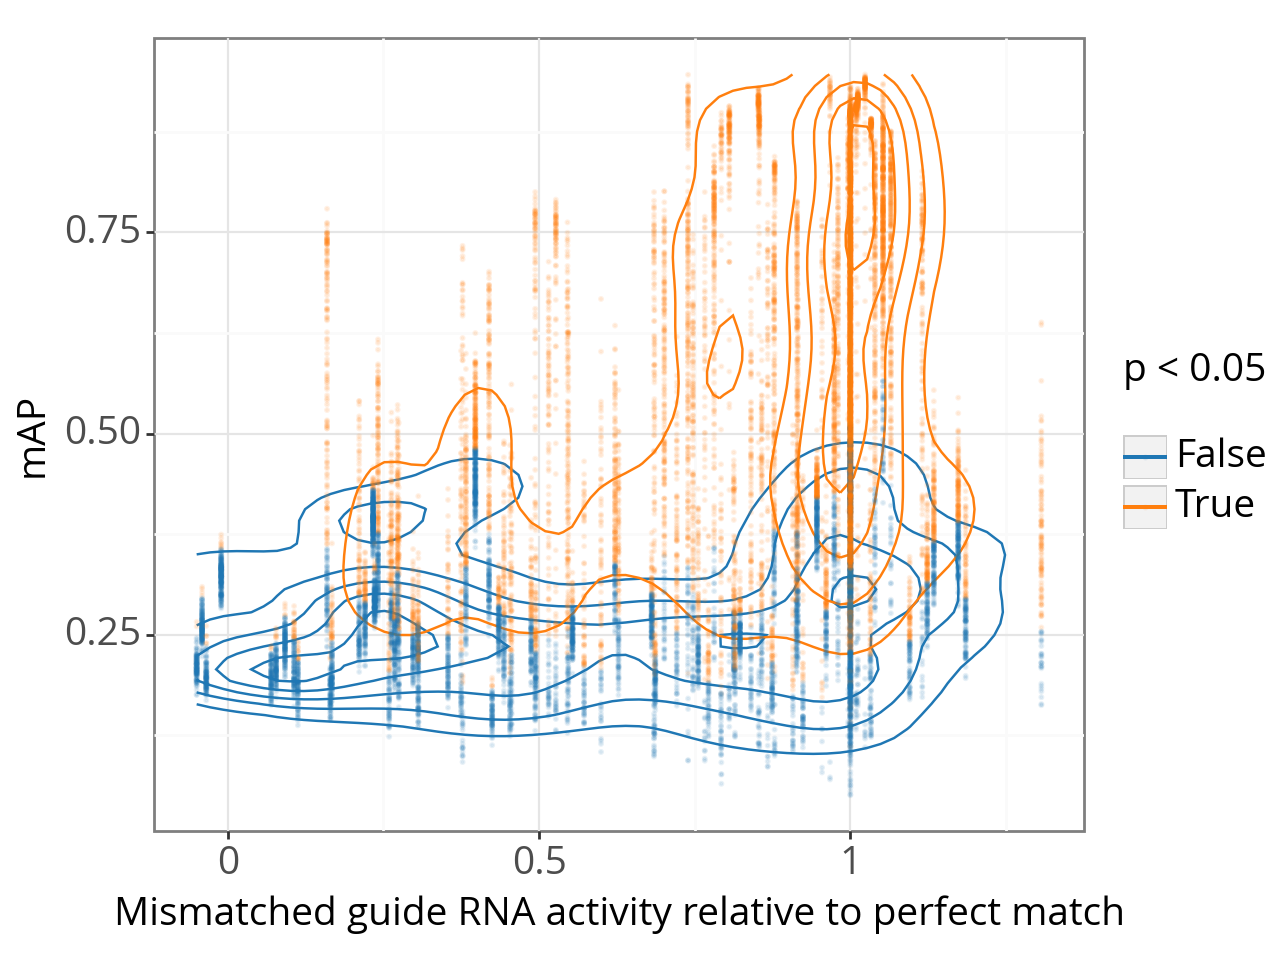

<Figure Size: (640 x 480)>

In [10]:
global_gg = (
    gg.ggplot(
        sc_df.dropna(subset=["gene"]),
        gg.aes(x="relative_activity_day5", y="mAP", color="p < 0.05"),
    )
    + gg.geom_density_2d()
    + gg.geom_point(size=0.2, alpha=0.1)
    + gg.theme_bw()
    + gg.xlab("Mismatched guide RNA activity relative to perfect match")
    + gg.ylab("mAP")
    + gg.scale_color_manual(values=color_map)
    # + gg.scale_color_gradient(low="blue", high="red")  # Color gradient from blue to red
    + gg.theme(
        text=gg.element_text(family="Open Sans", size=14),
        axis_title=gg.element_text(family="Open Sans", size=14),
        legend_title=gg.element_text(margin={"b": 20}),
    )
)

output_file = pathlib.Path(
    f"{output_dir}/{gse_id}_singlecell_crispri_map_relative_activity_comparison.png"
)
global_gg.save(output_file, dpi=500, height=5, width=6)

global_gg

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/GSE132080_singlecell_by_gene_crispri_map_relative_activity_comparison.png


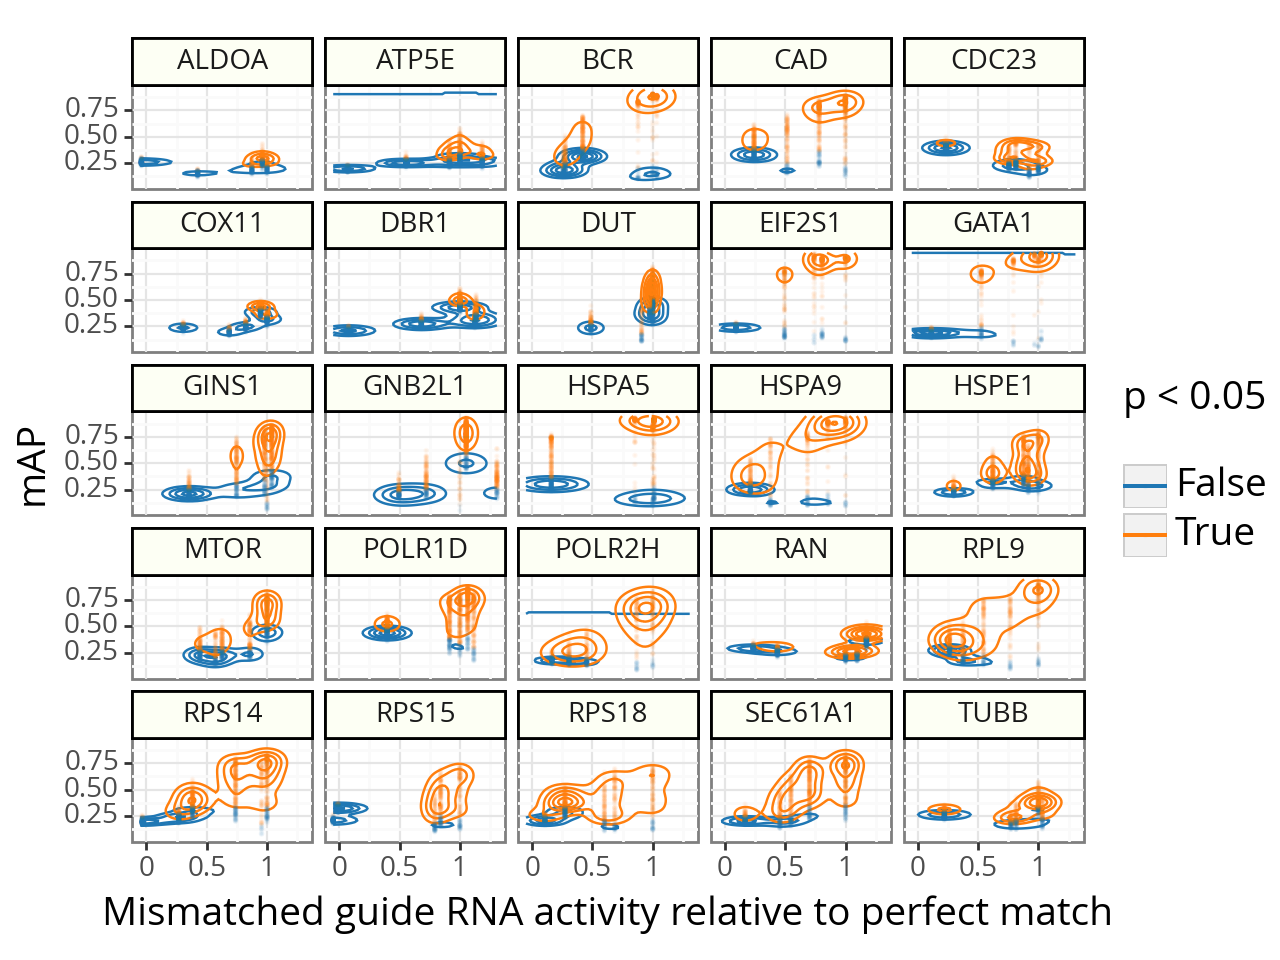

<Figure Size: (640 x 480)>

In [11]:
gene_gg = (
    gg.ggplot(
        sc_df.dropna(subset=["gene"]),
        gg.aes(x="relative_activity_day5", y="mAP", color="p < 0.05"),
    )
    + gg.geom_density_2d()
    + gg.geom_point(alpha=0.05, size=0.1)
    + gg.theme_bw()
    + gg.xlab("Mismatched guide RNA activity relative to perfect match")
    + gg.ylab("mAP")
    # + gg.scale_color_gradient(low="blue", high="red", limits=[0, 1])
    # + gg.guides(color=gg.guide_colorbar(title="mAP"))
    + gg.scale_color_manual(values=color_map)
    + gg.facet_wrap("~gene")
    + gg.theme(
        strip_background=gg.element_rect(colour="black", fill="#fdfff4"),
        axis_text=gg.element_text(size=10),
        text=gg.element_text(family="Open Sans", size=14),
        axis_title=gg.element_text(family="Open Sans", size=14),
        legend_title=gg.element_text(margin={"b": 20}),
        strip_text=gg.element_text(size=10, family="Open Sans"),
    )
)

output_file = pathlib.Path(
    f"{output_dir}/{gse_id}_singlecell_by_gene_crispri_map_relative_activity_comparison.png"
)
gene_gg.save(output_file, dpi=500, height=5, width=6)

gene_gg

## Plot individual UMAPs per gene

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_ALDOA_singlecell_umap_map.png


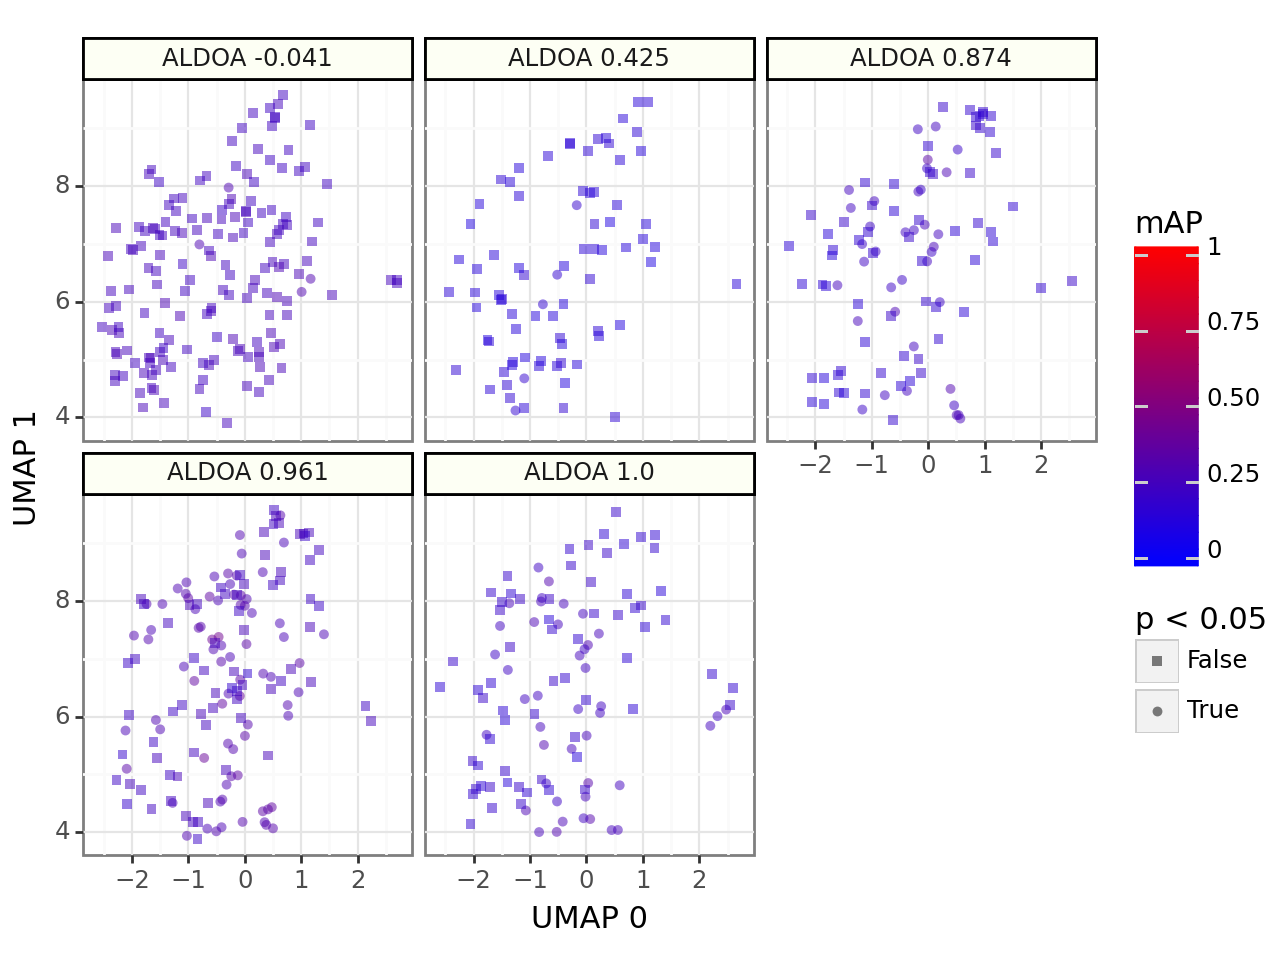

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_ATP5E_singlecell_umap_map.png


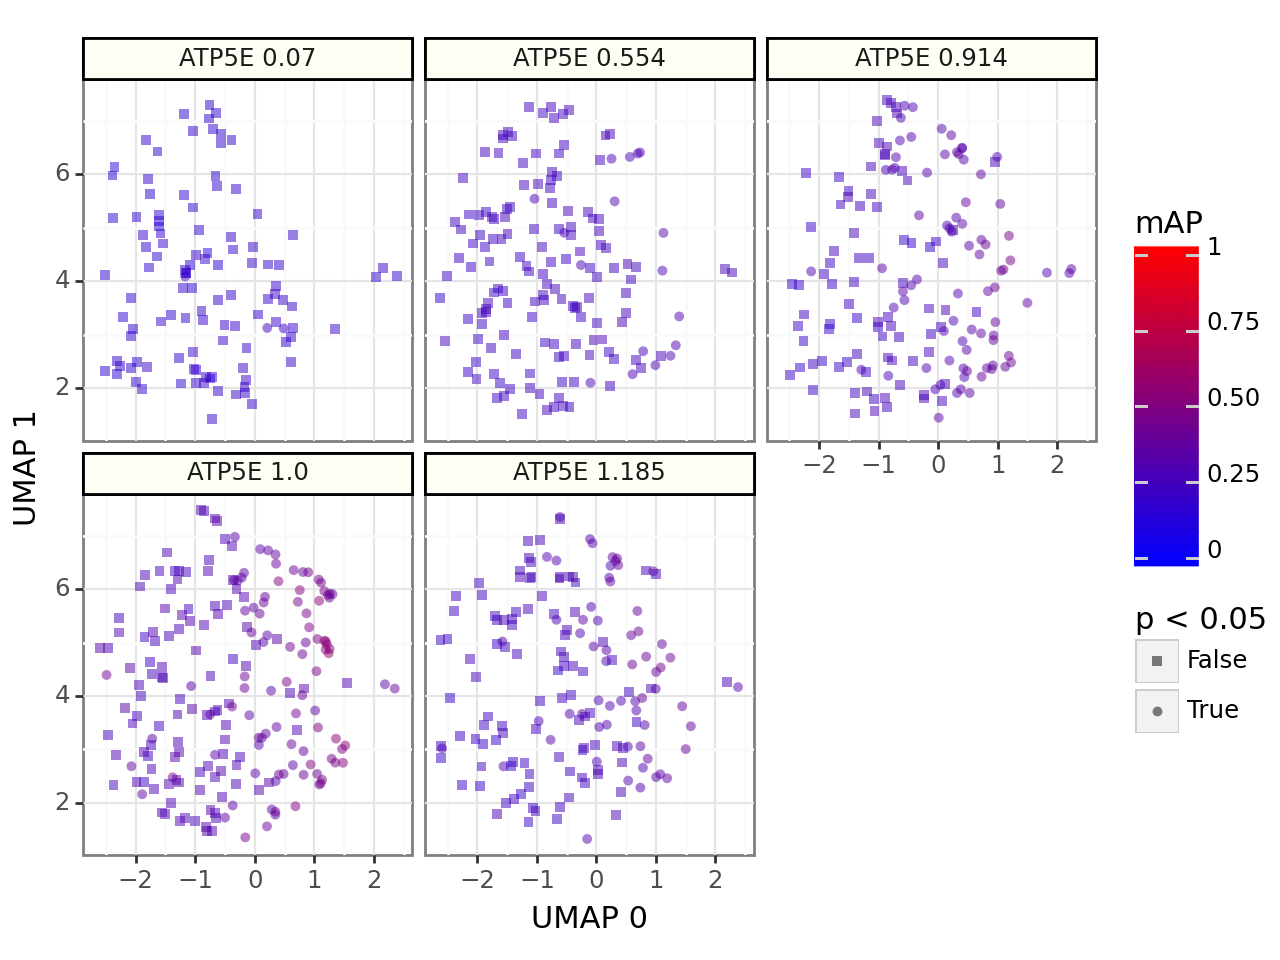

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_BCR_singlecell_umap_map.png


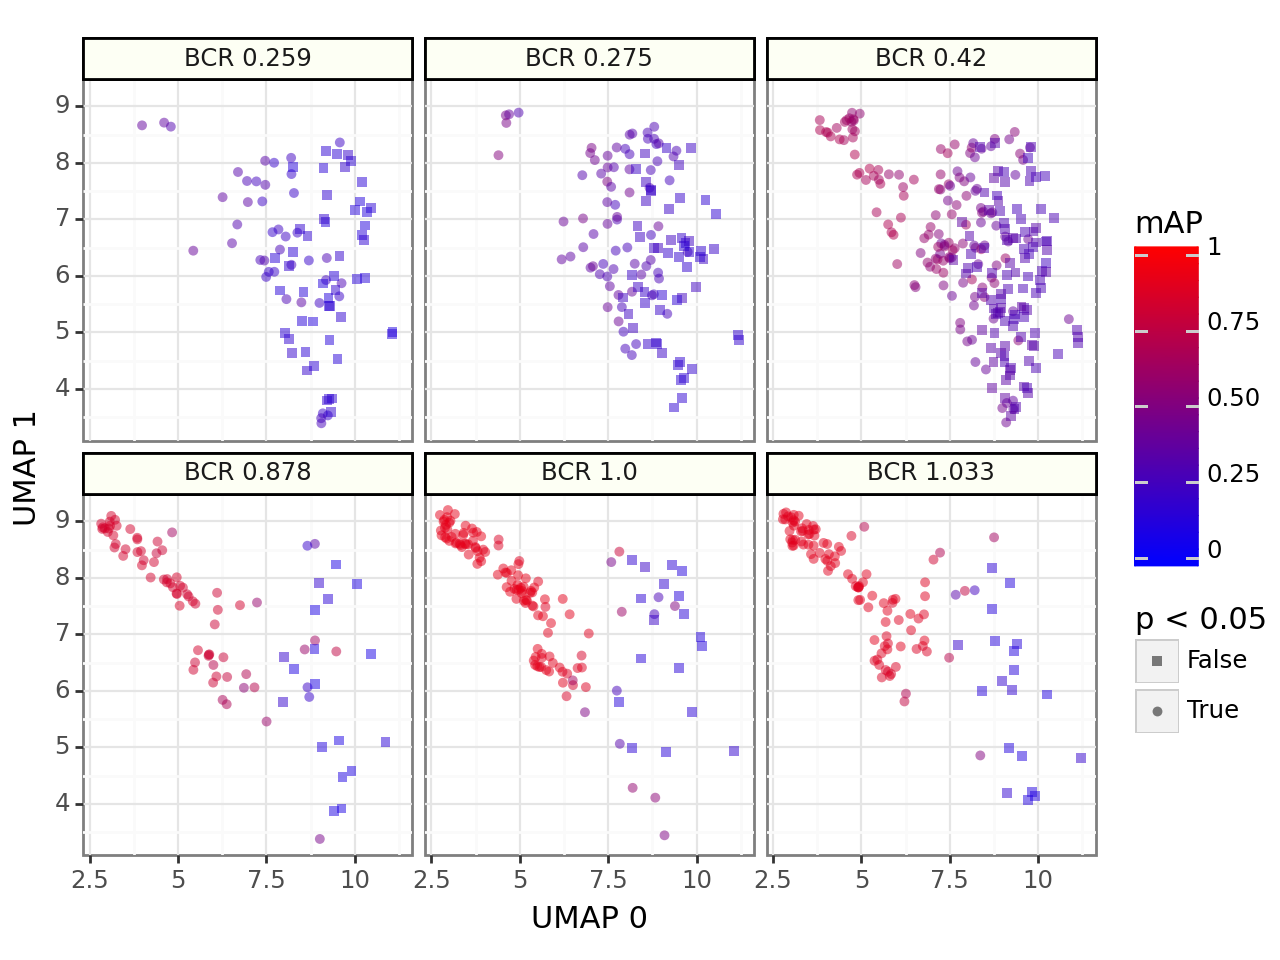

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_CAD_singlecell_umap_map.png


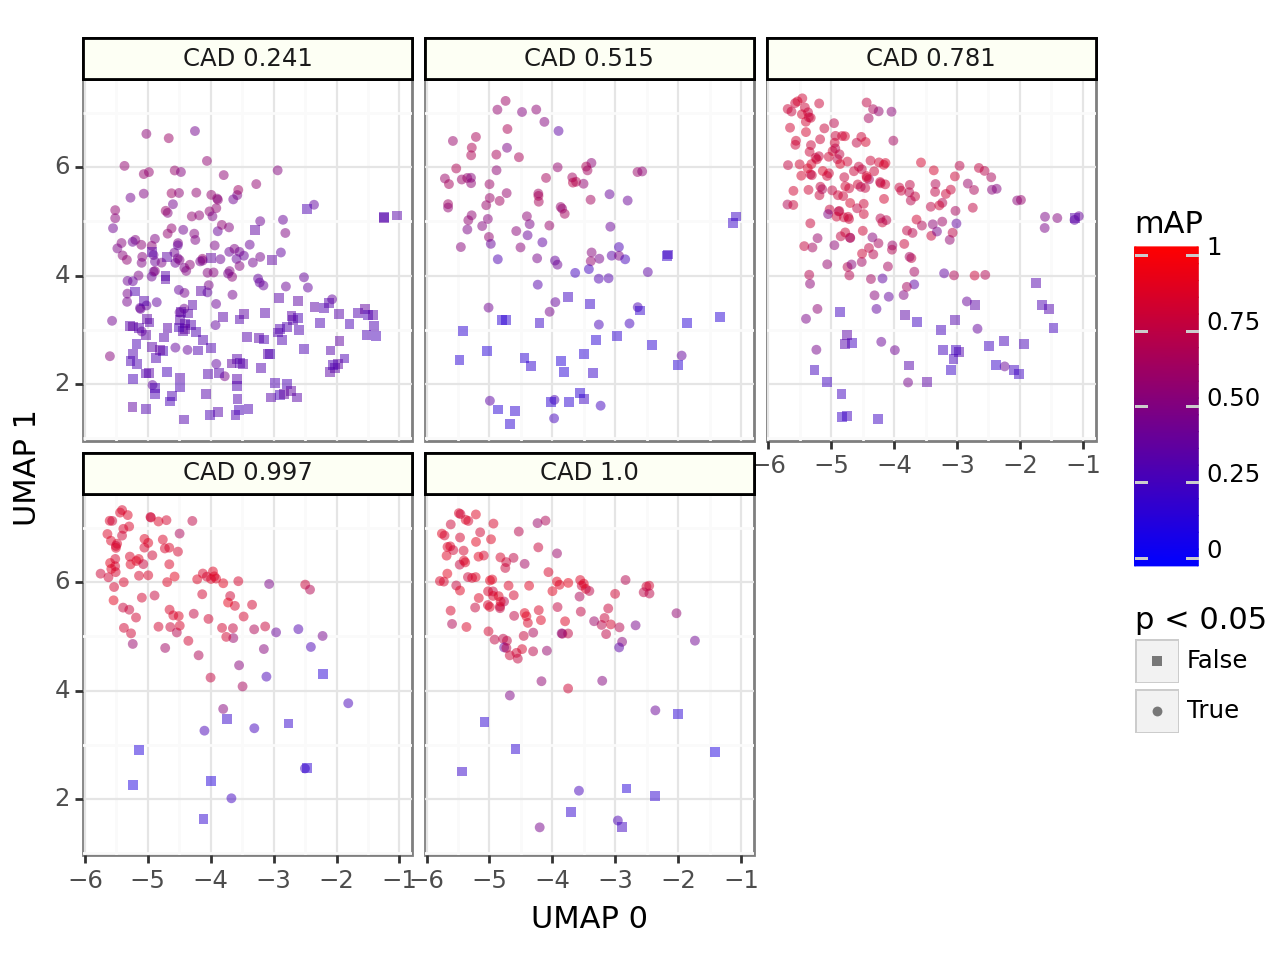

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_CDC23_singlecell_umap_map.png


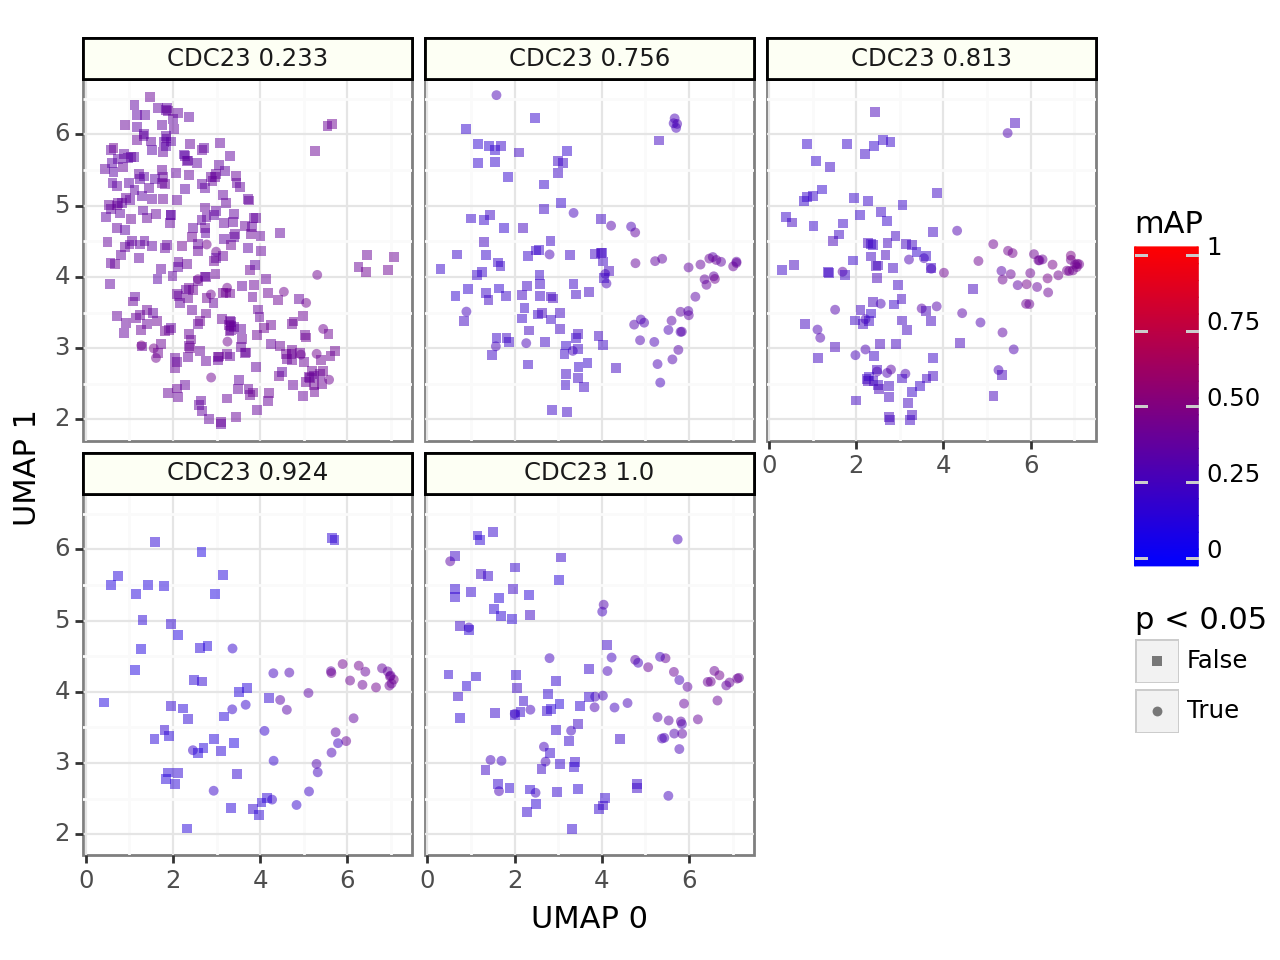

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_COX11_singlecell_umap_map.png


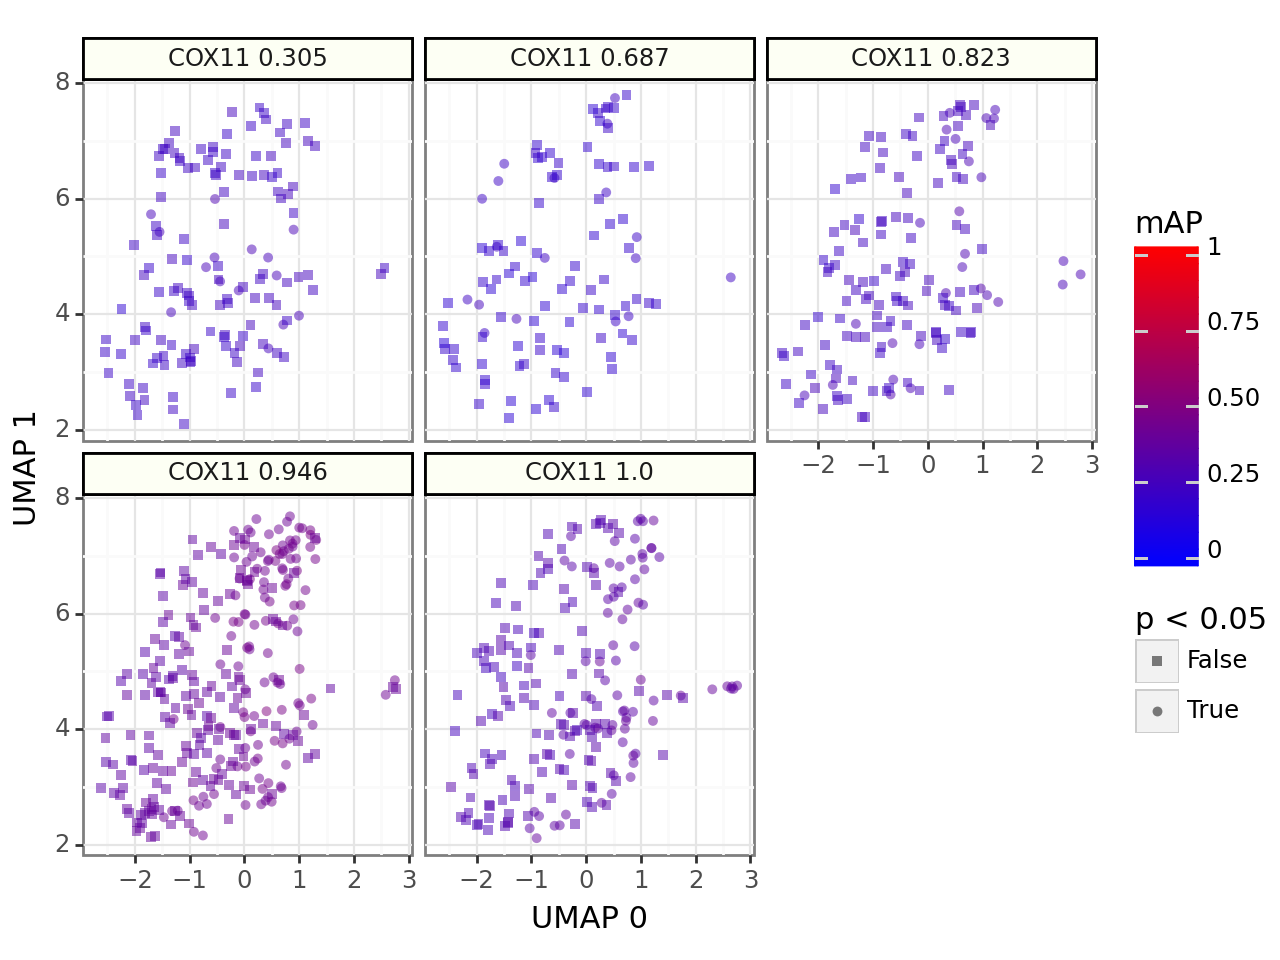

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_DBR1_singlecell_umap_map.png


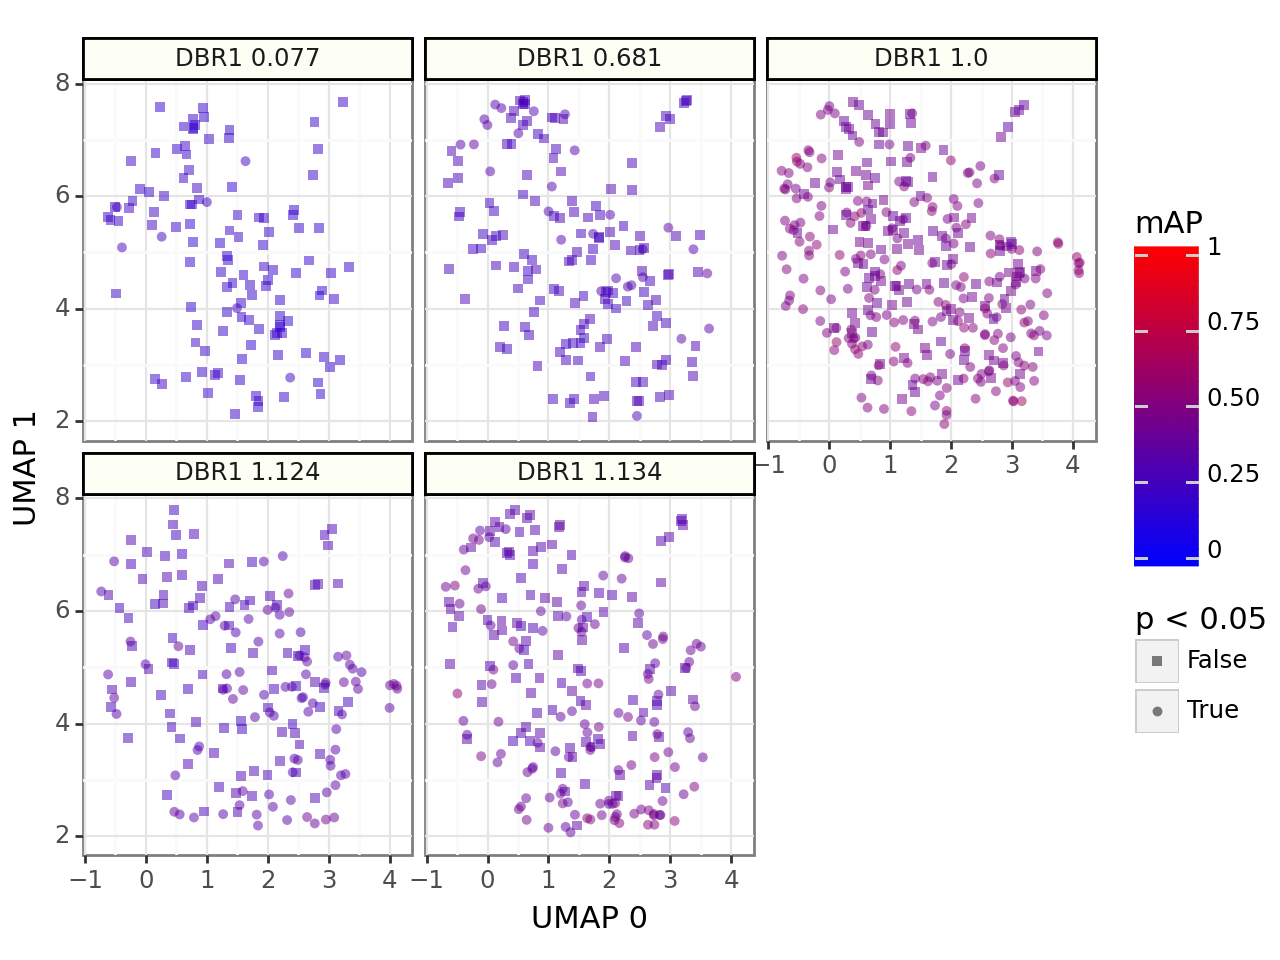

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_DUT_singlecell_umap_map.png


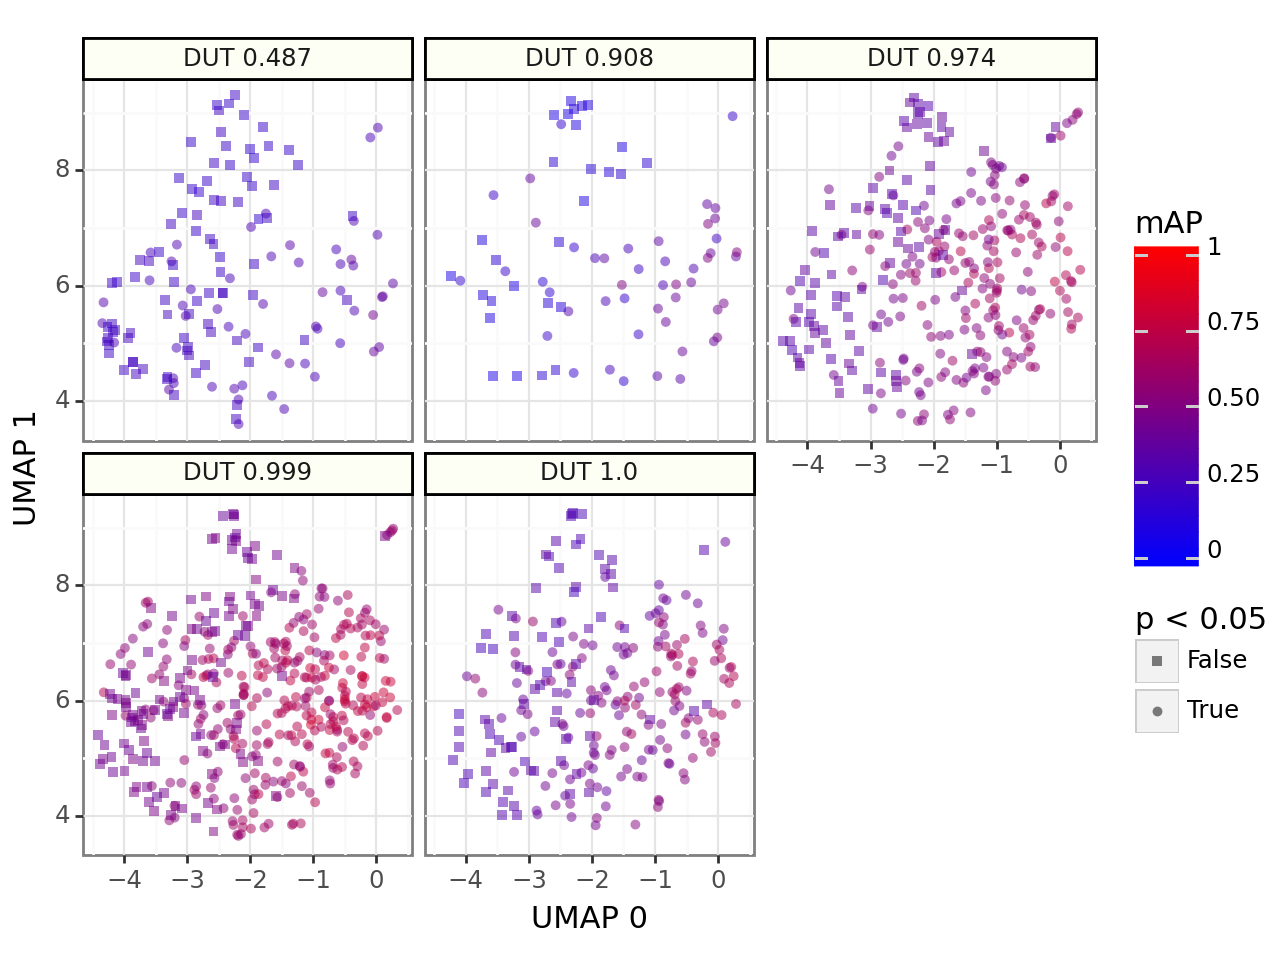

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_EIF2S1_singlecell_umap_map.png


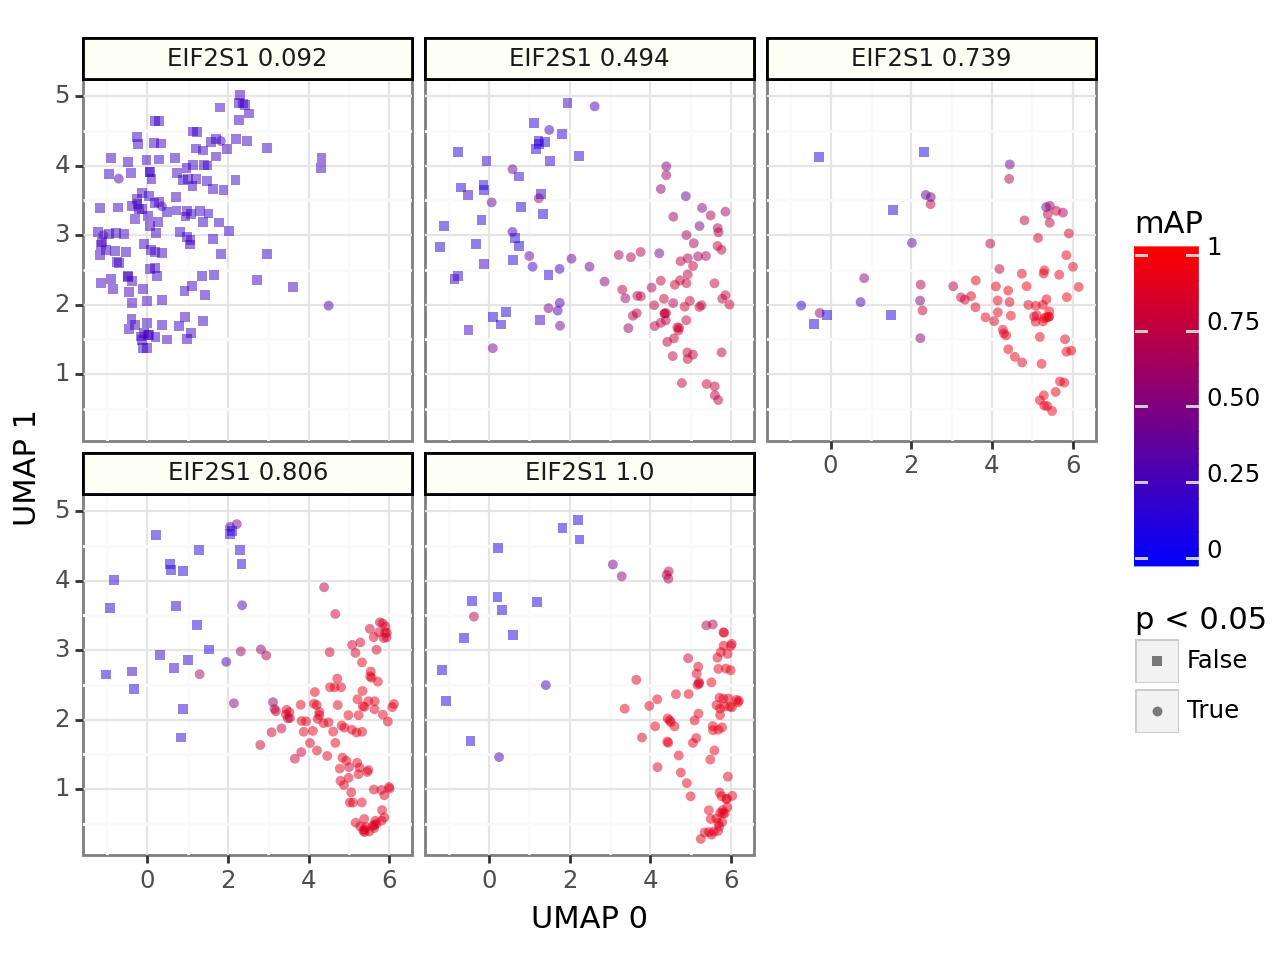

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_GATA1_singlecell_umap_map.png


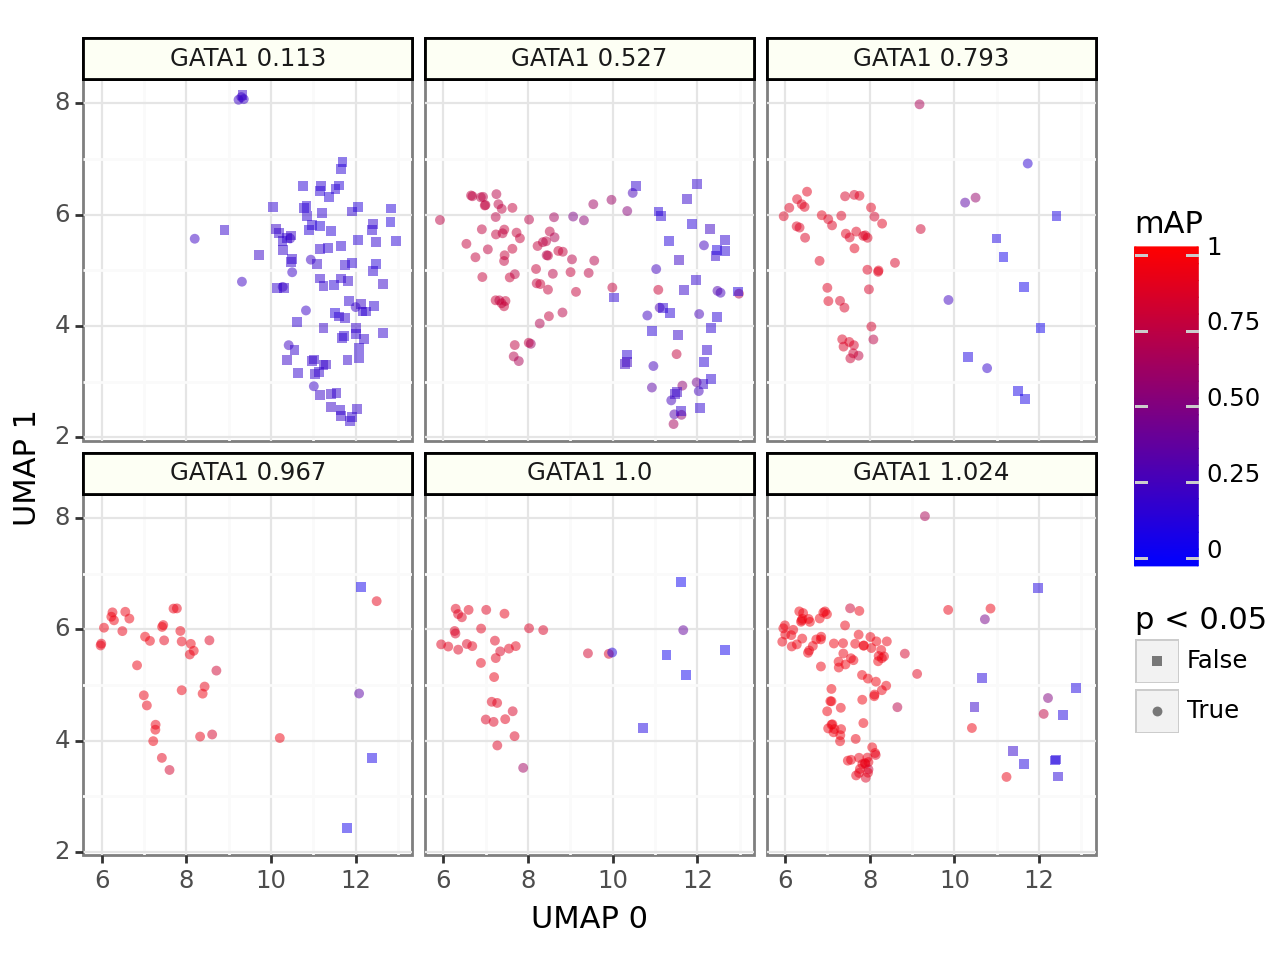

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_GINS1_singlecell_umap_map.png


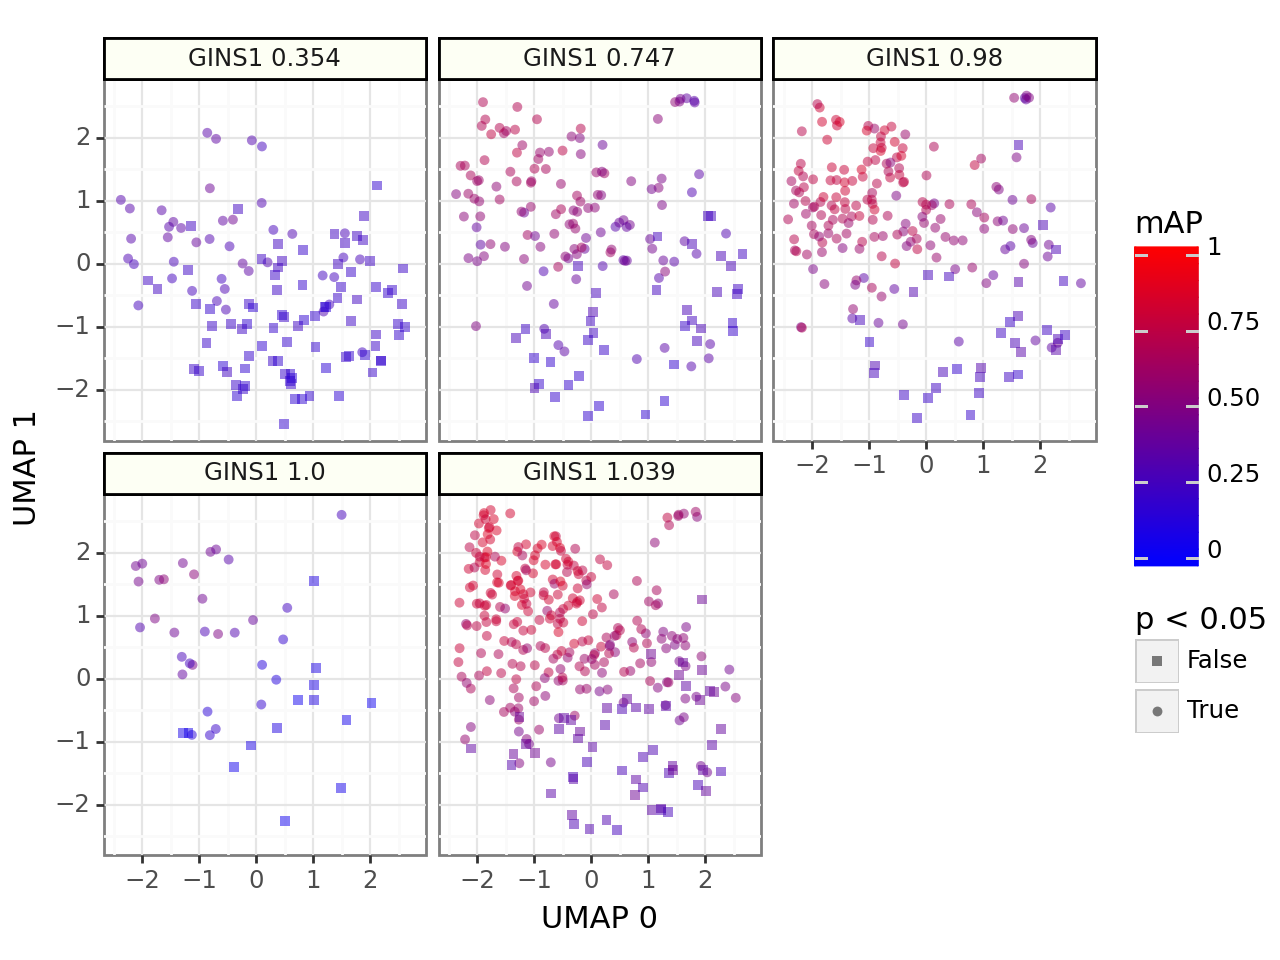

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_GNB2L1_singlecell_umap_map.png


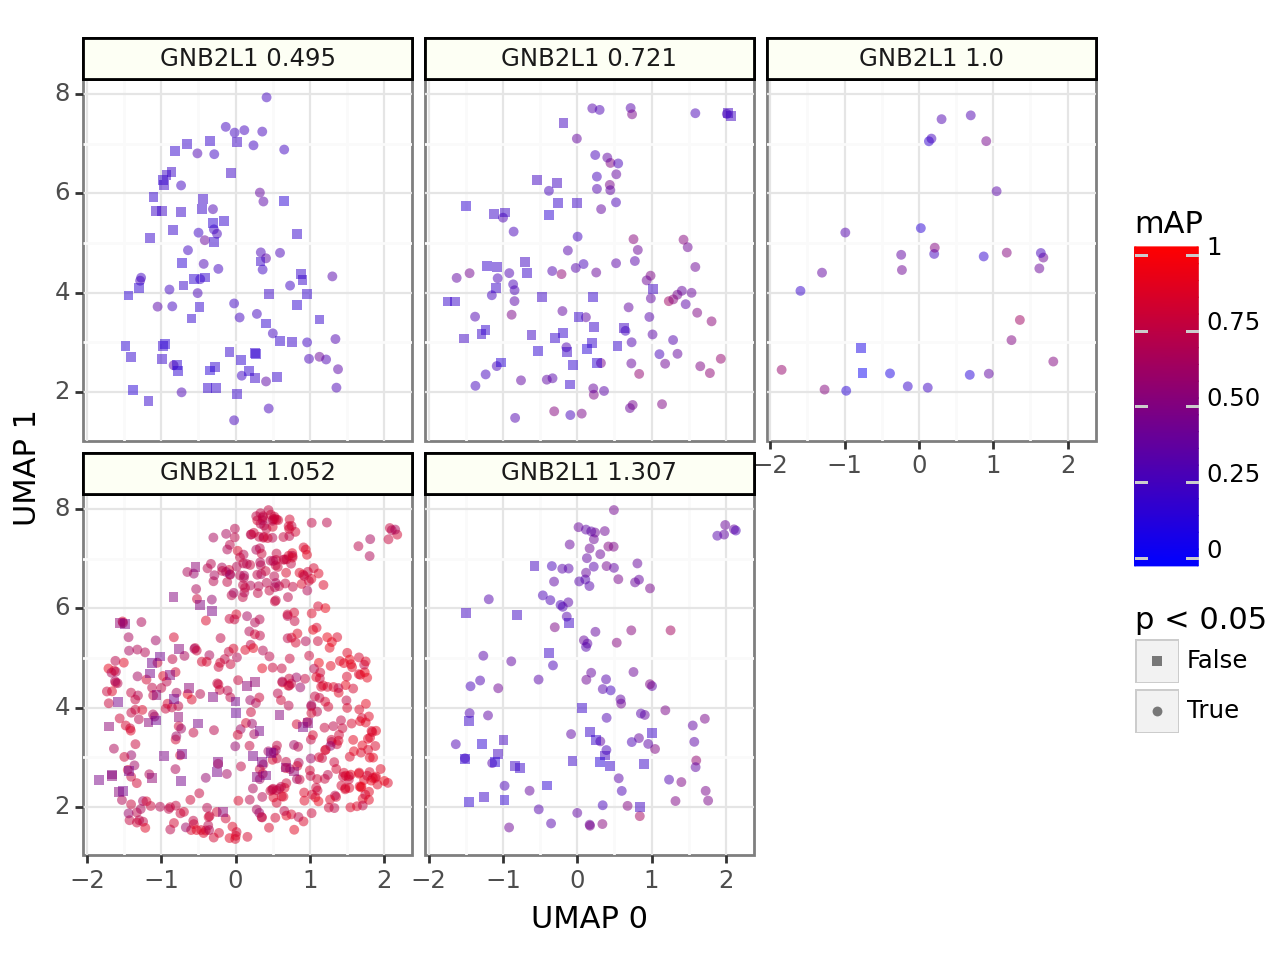

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_HSPA5_singlecell_umap_map.png


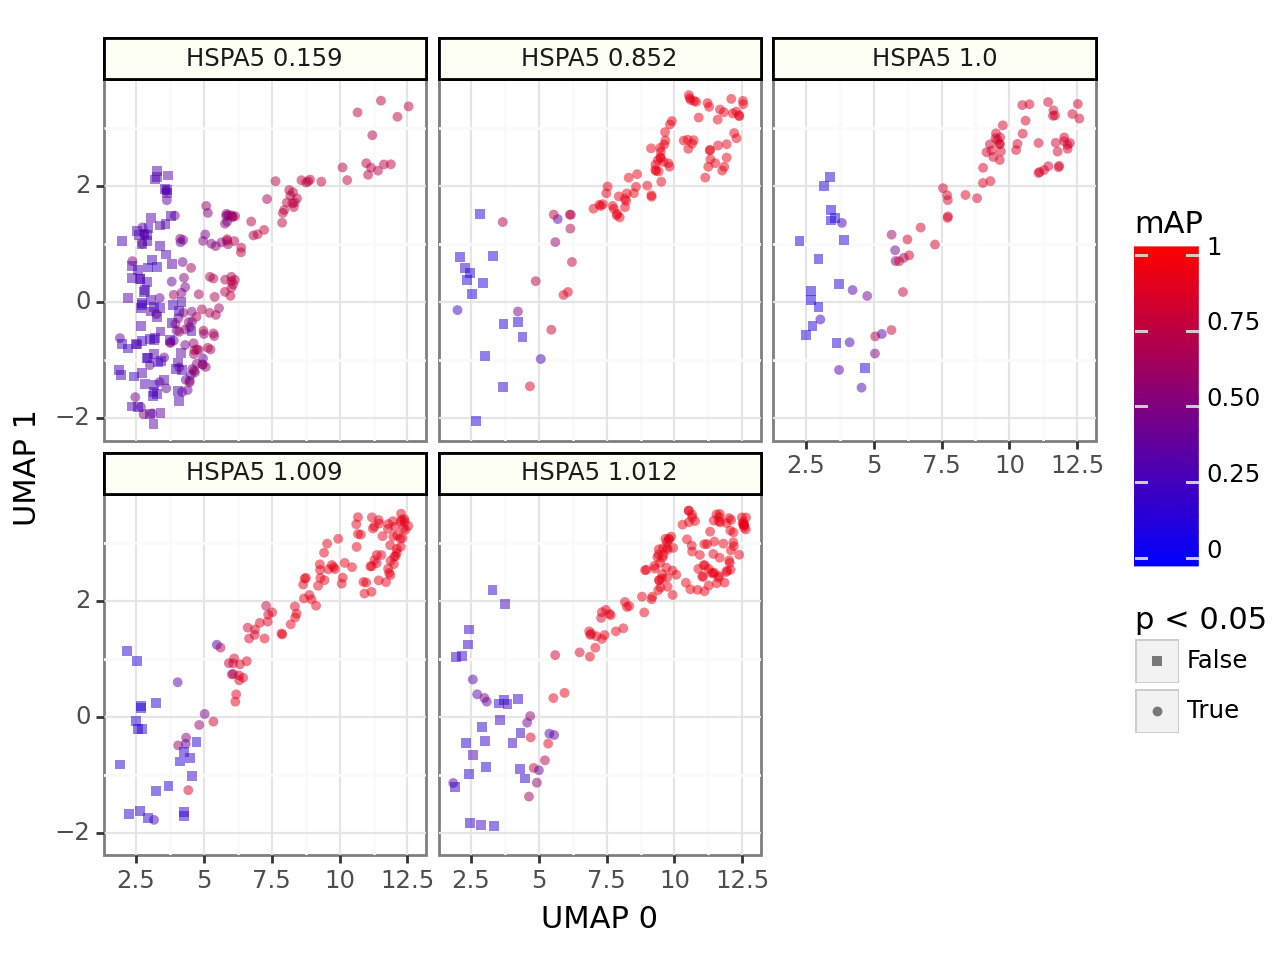

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_HSPA9_singlecell_umap_map.png


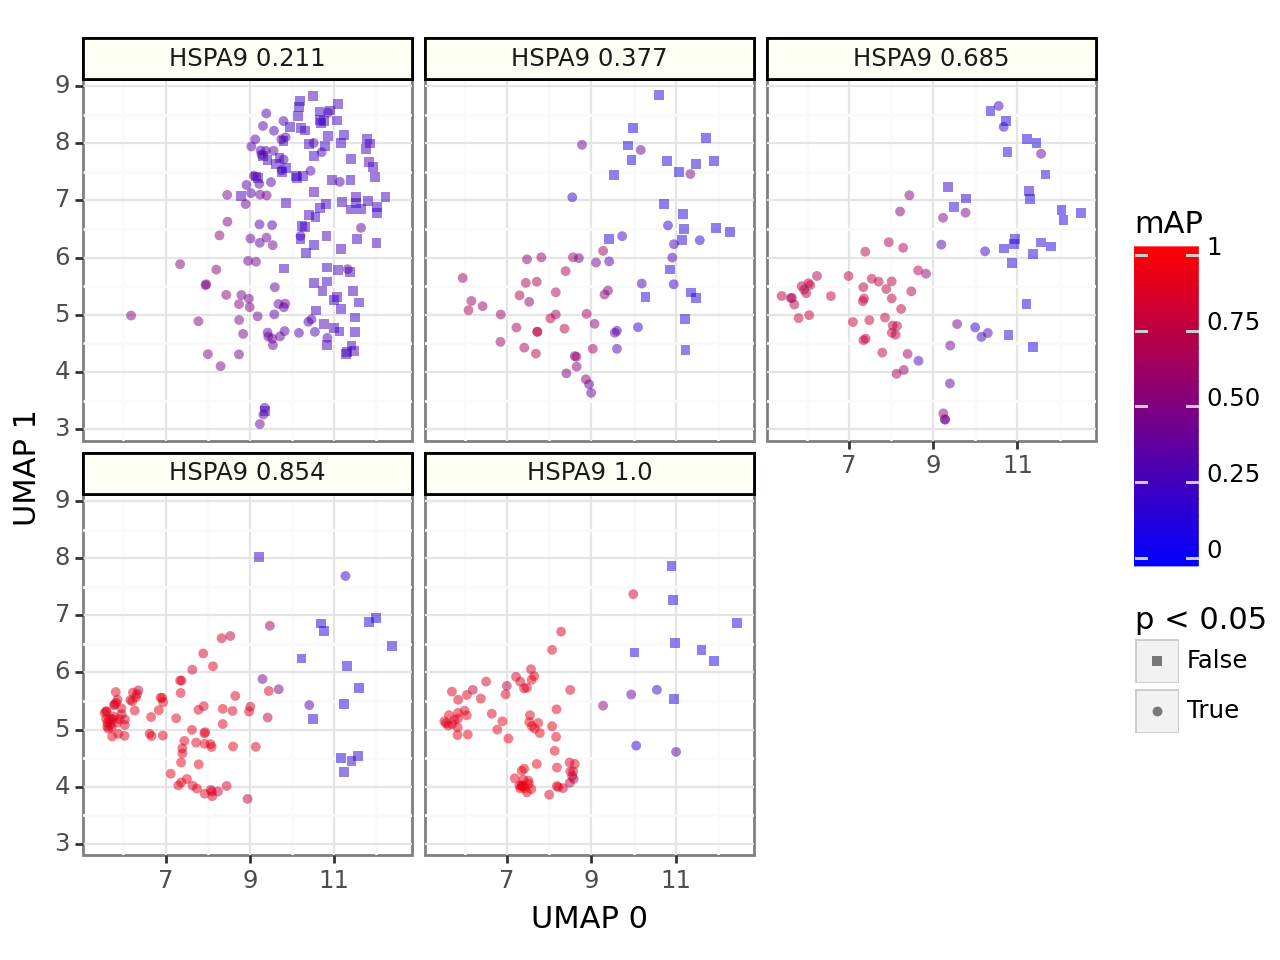

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_HSPE1_singlecell_umap_map.png


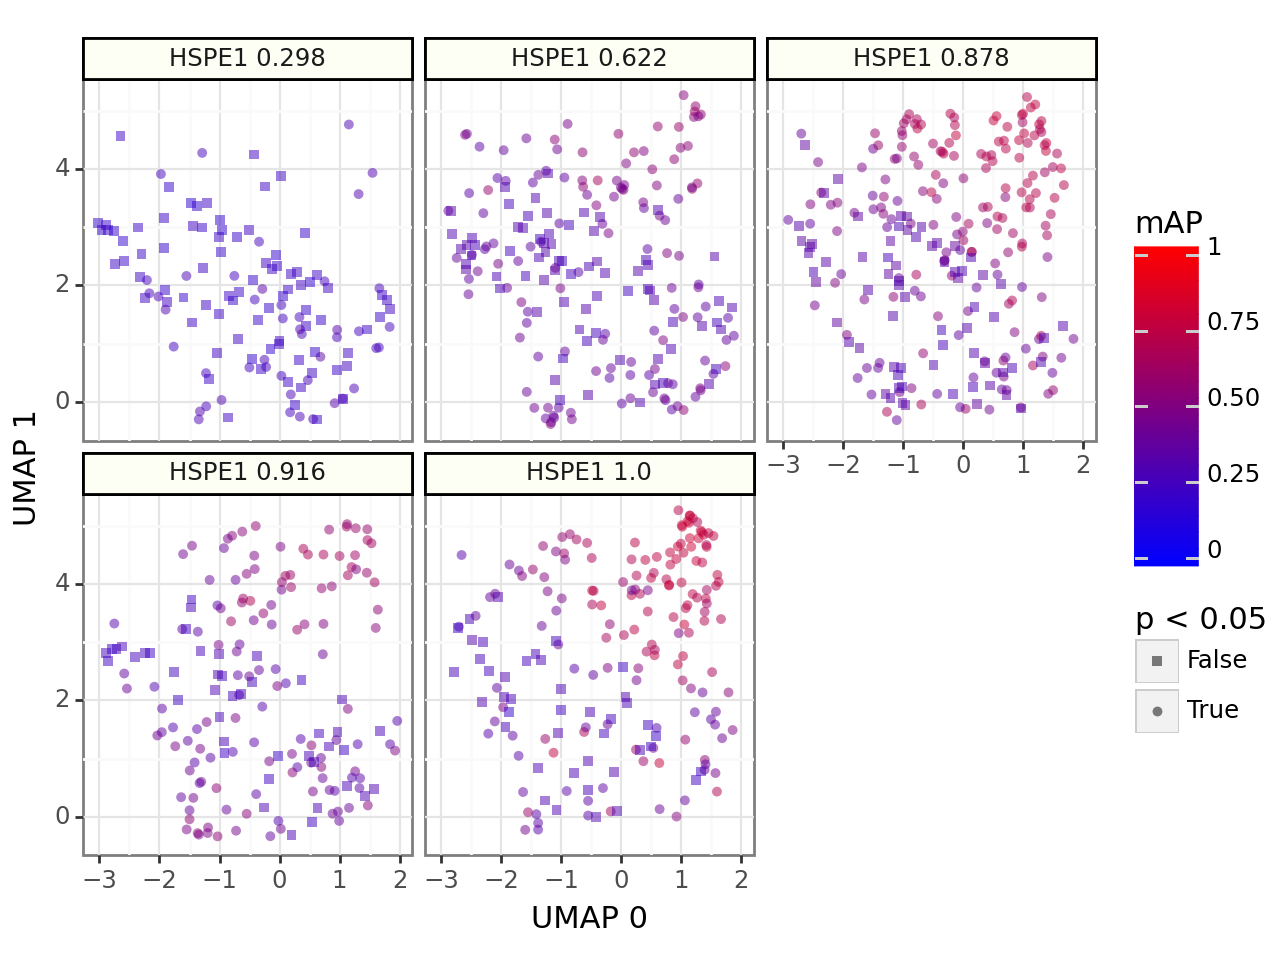

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_MTOR_singlecell_umap_map.png


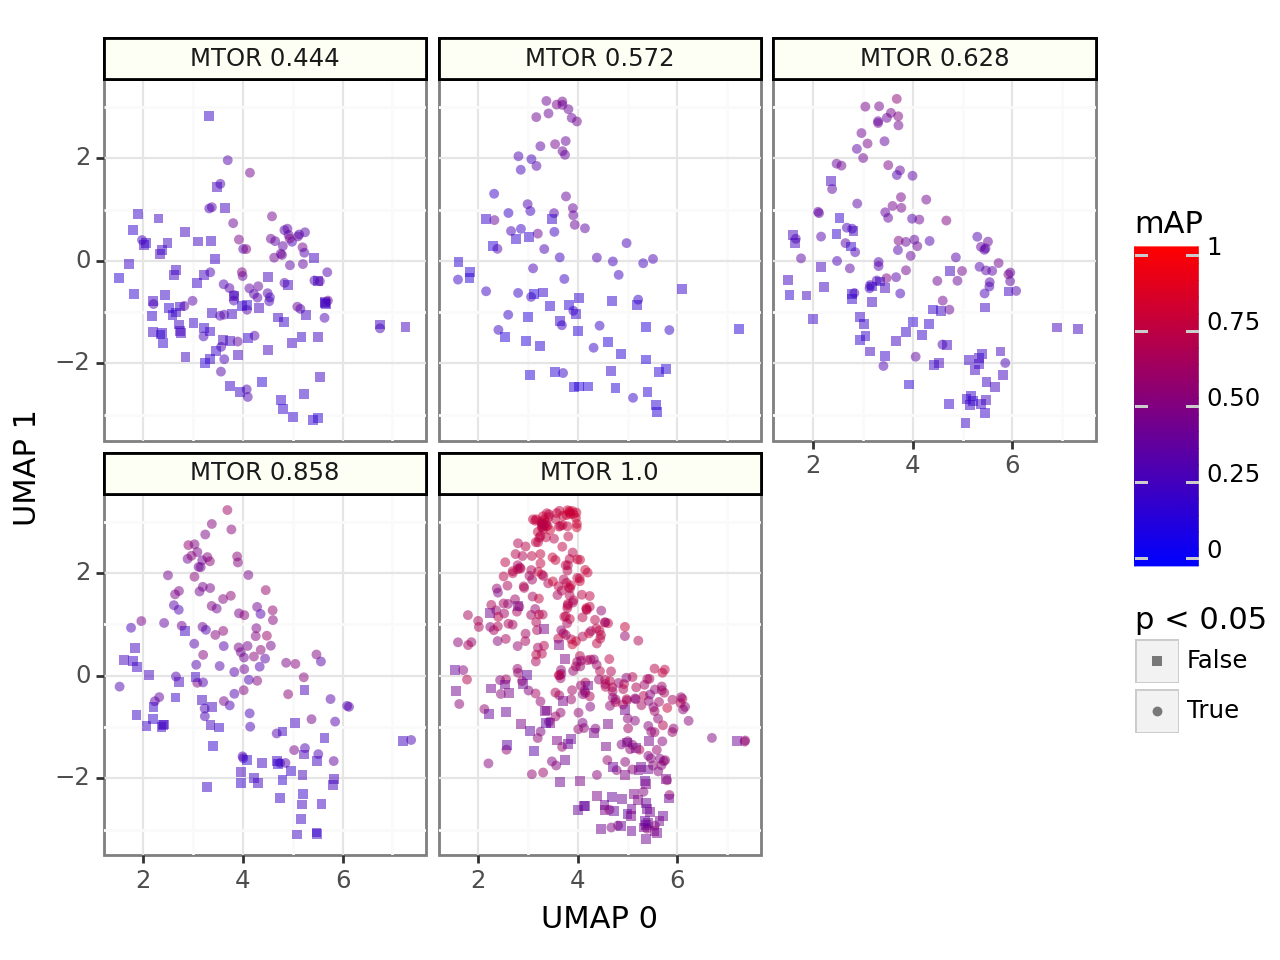

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_POLR1D_singlecell_umap_map.png


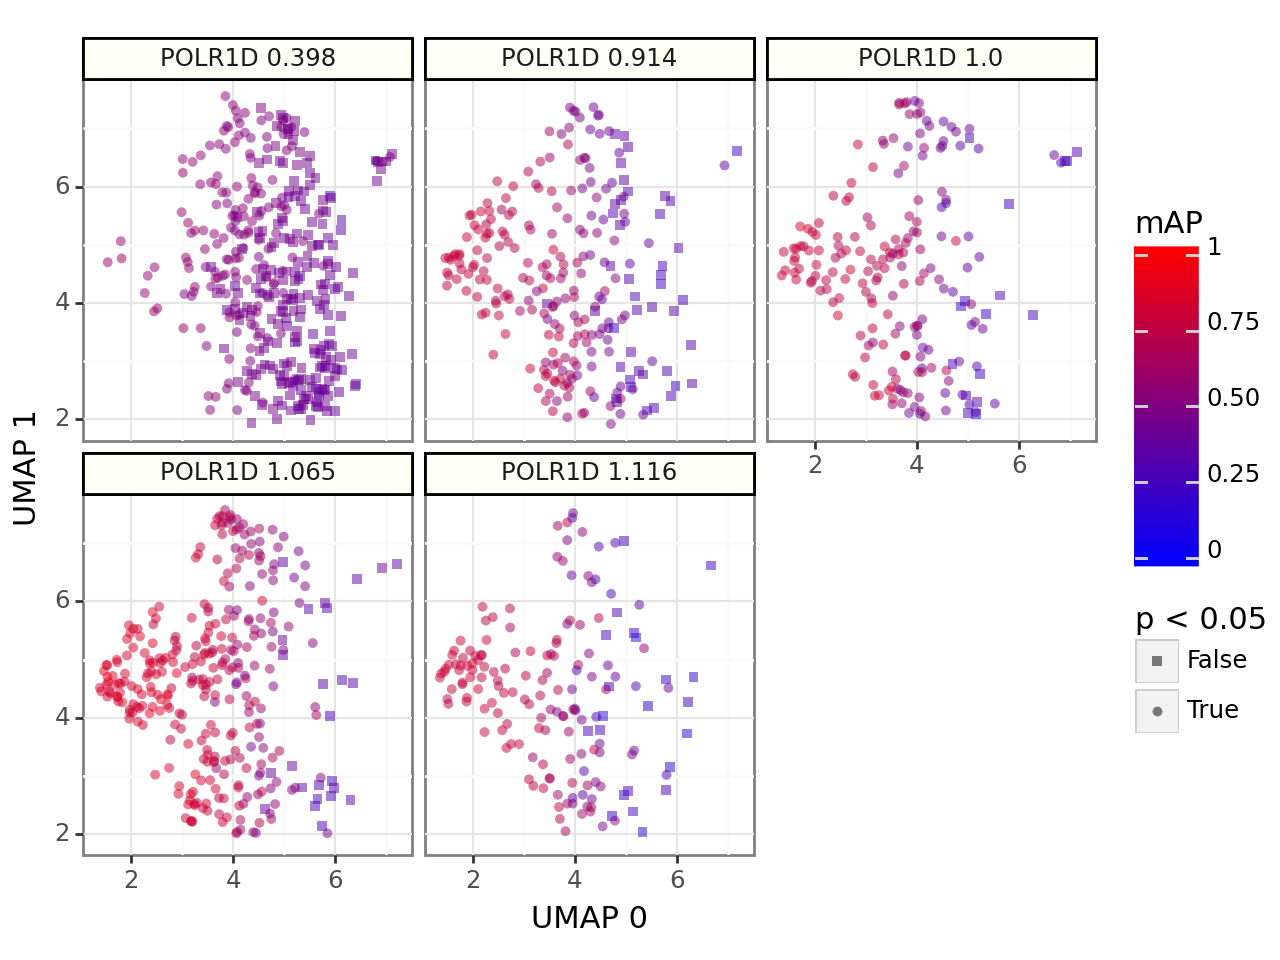

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_POLR2H_singlecell_umap_map.png


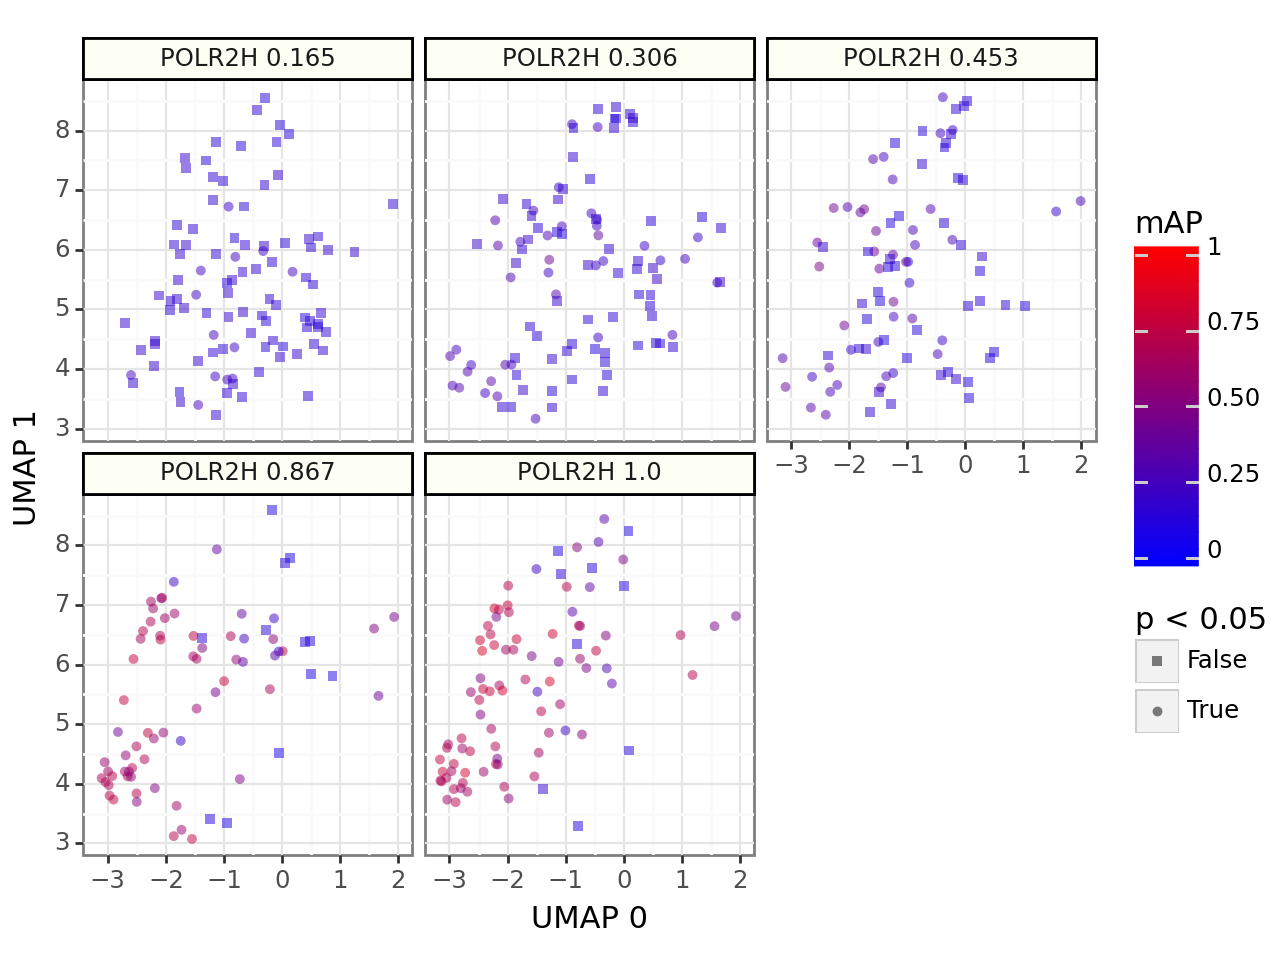

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_RAN_singlecell_umap_map.png


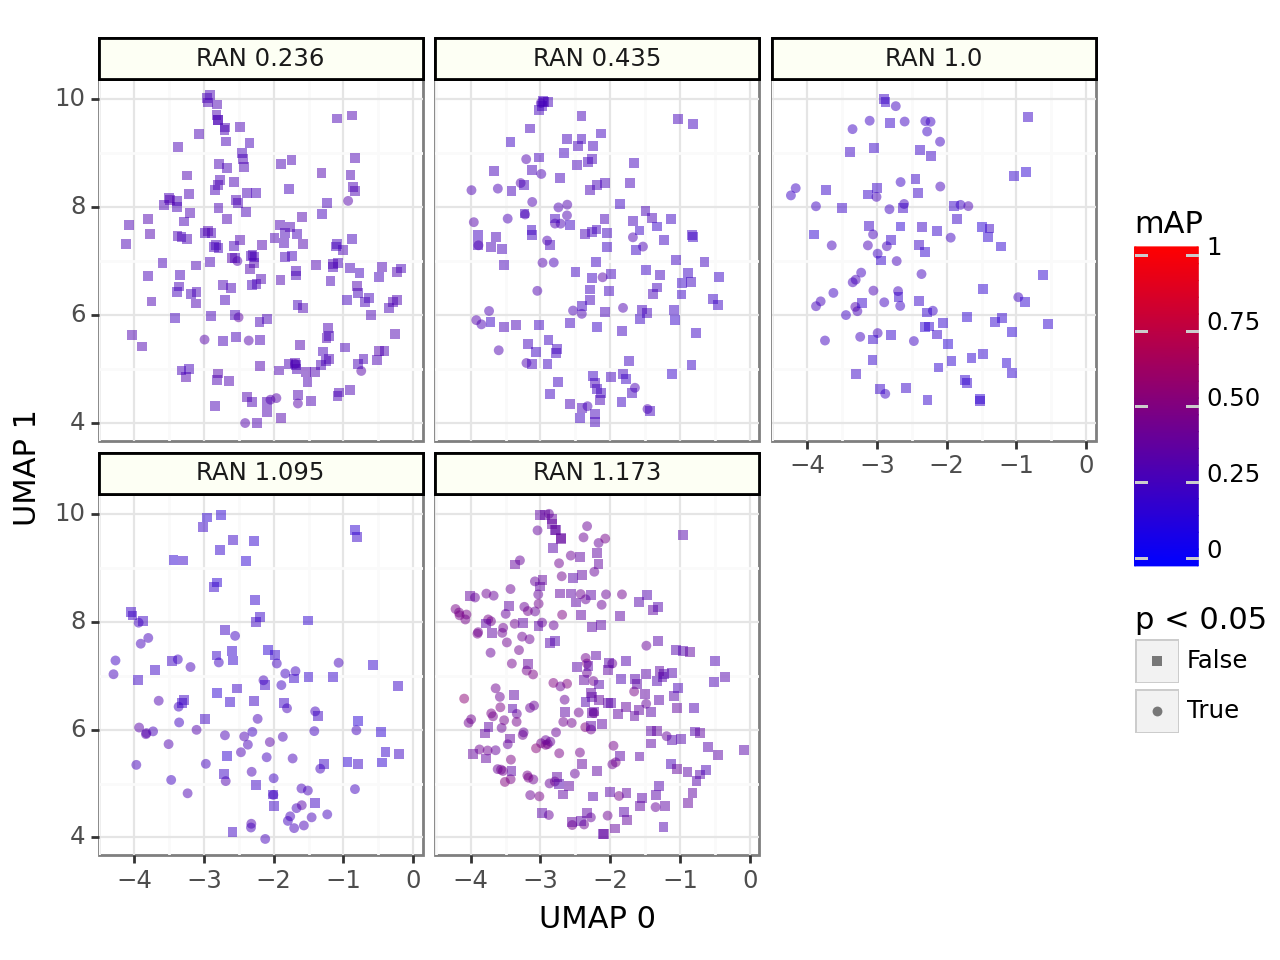

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_RPL9_singlecell_umap_map.png


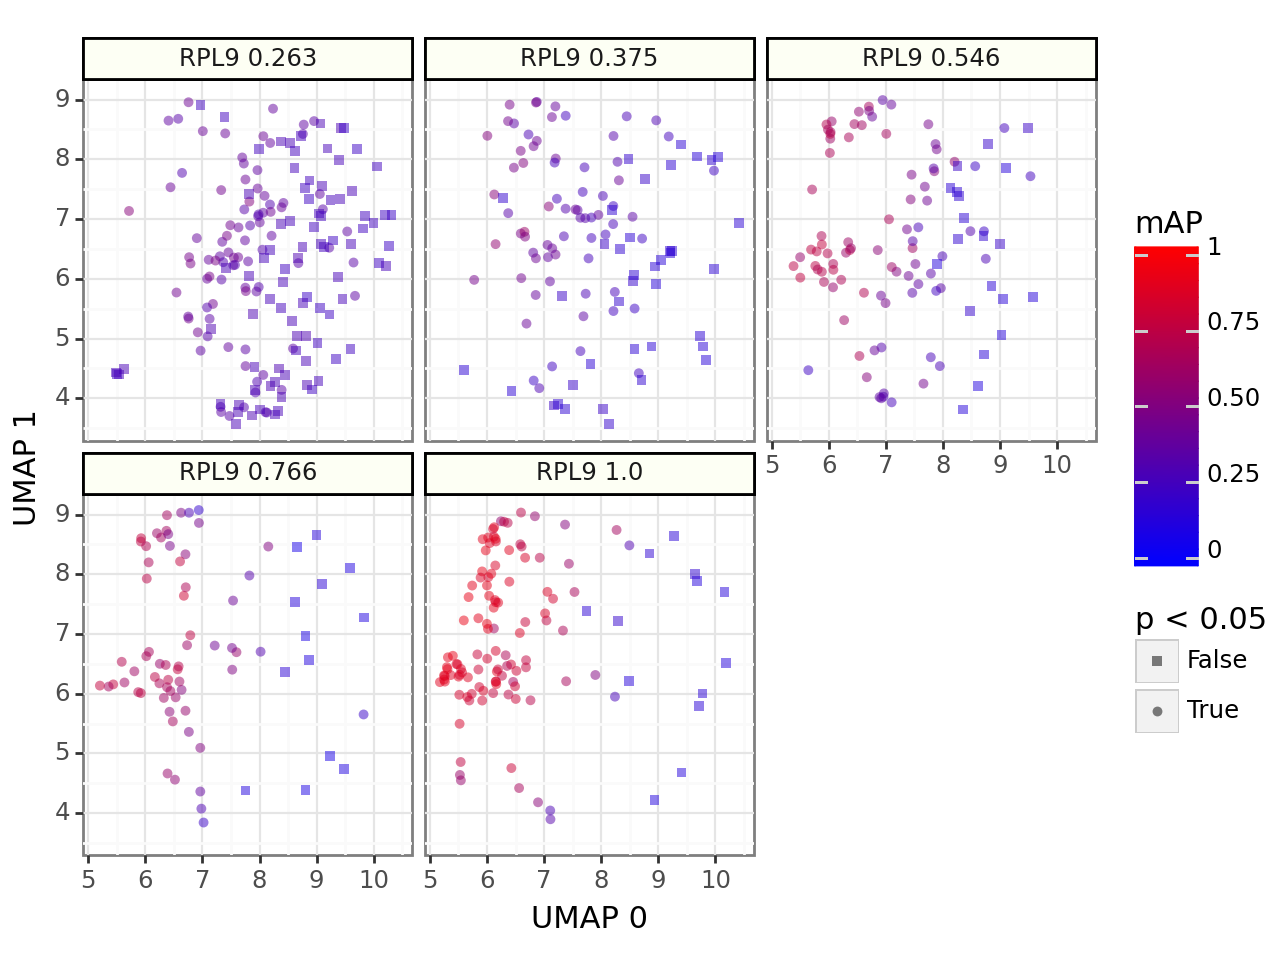

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_RPS14_singlecell_umap_map.png


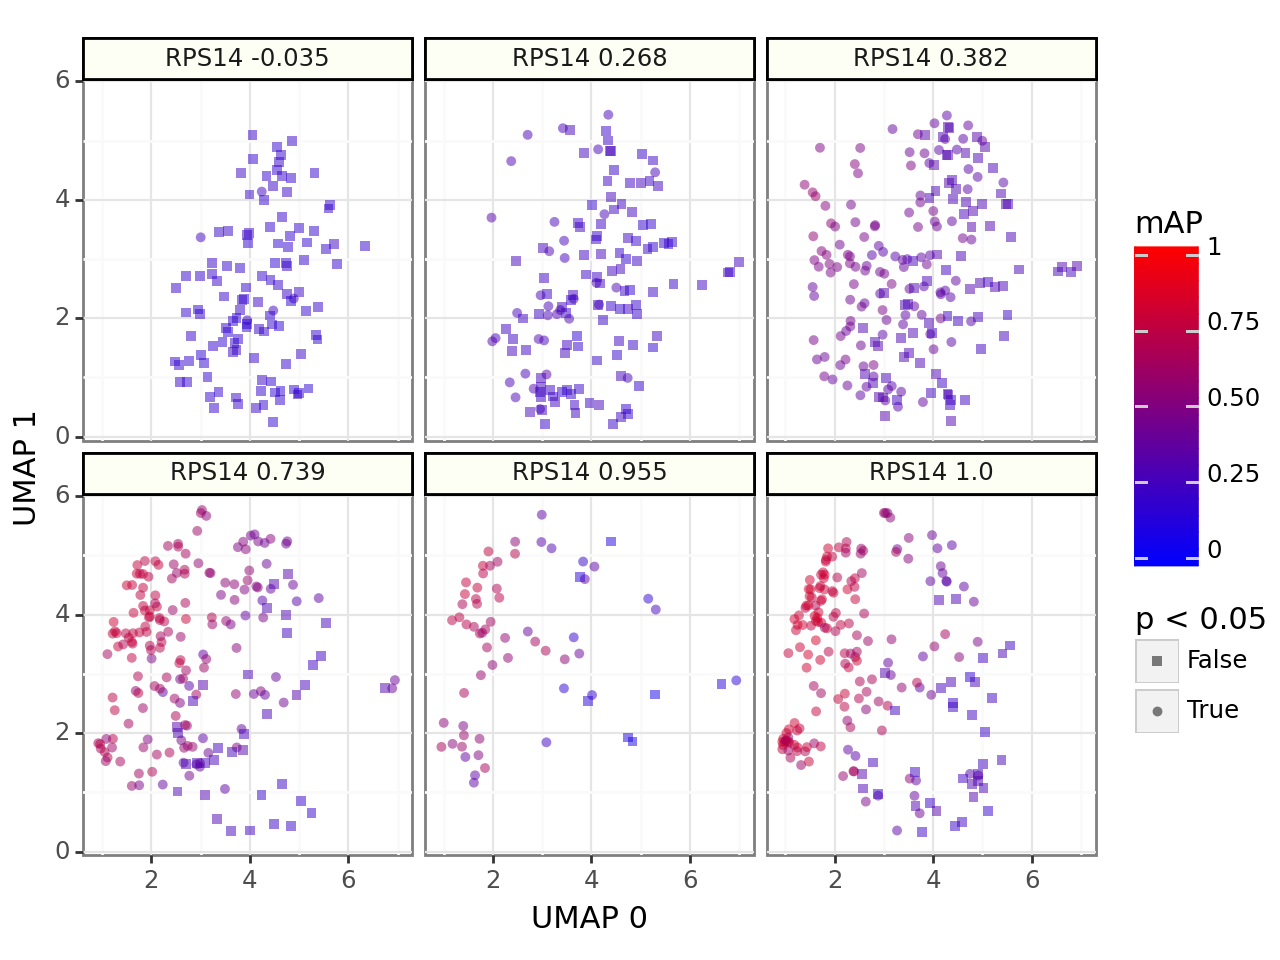

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_RPS15_singlecell_umap_map.png


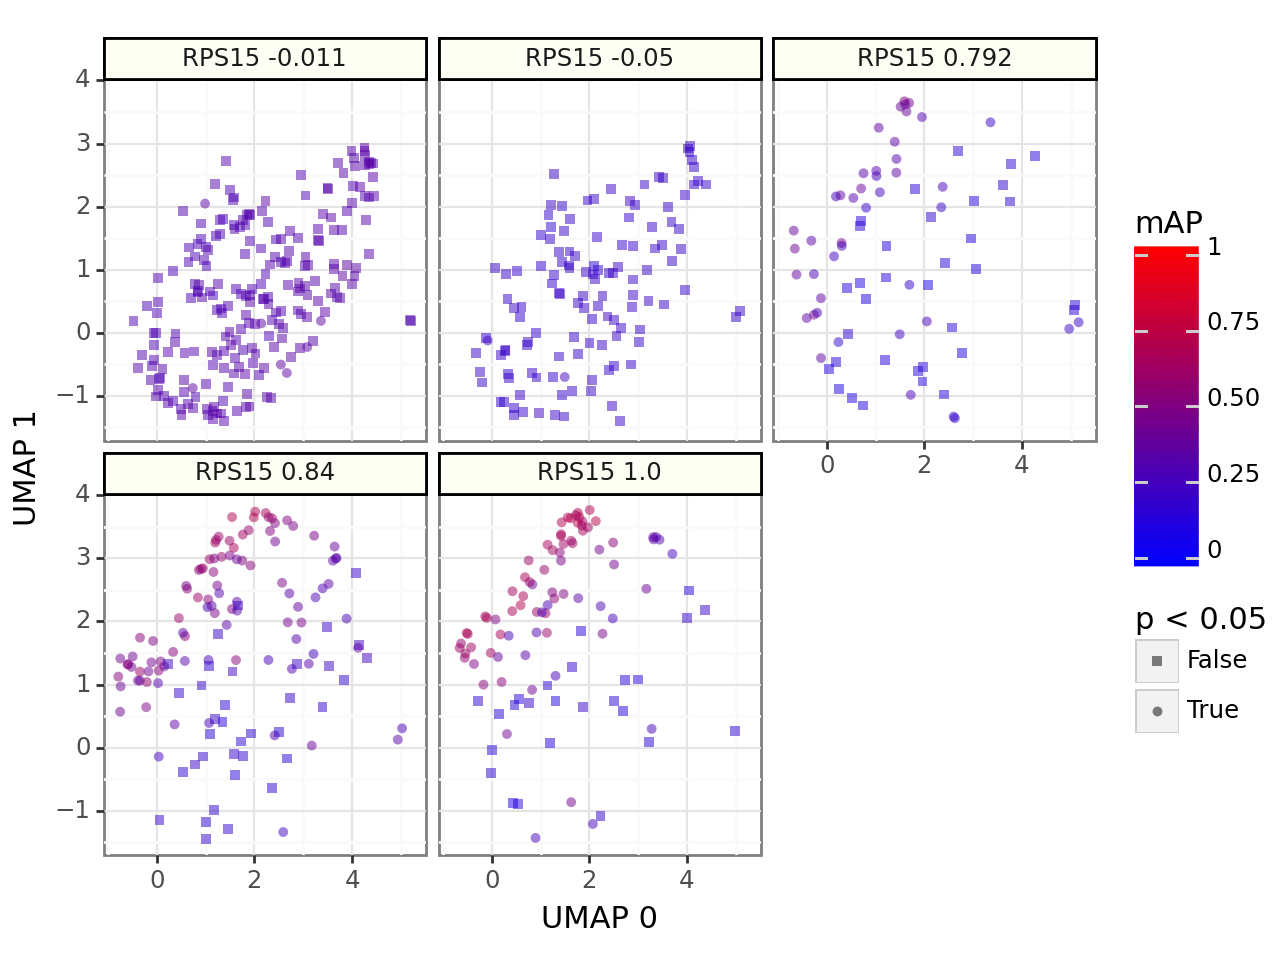

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_RPS18_singlecell_umap_map.png


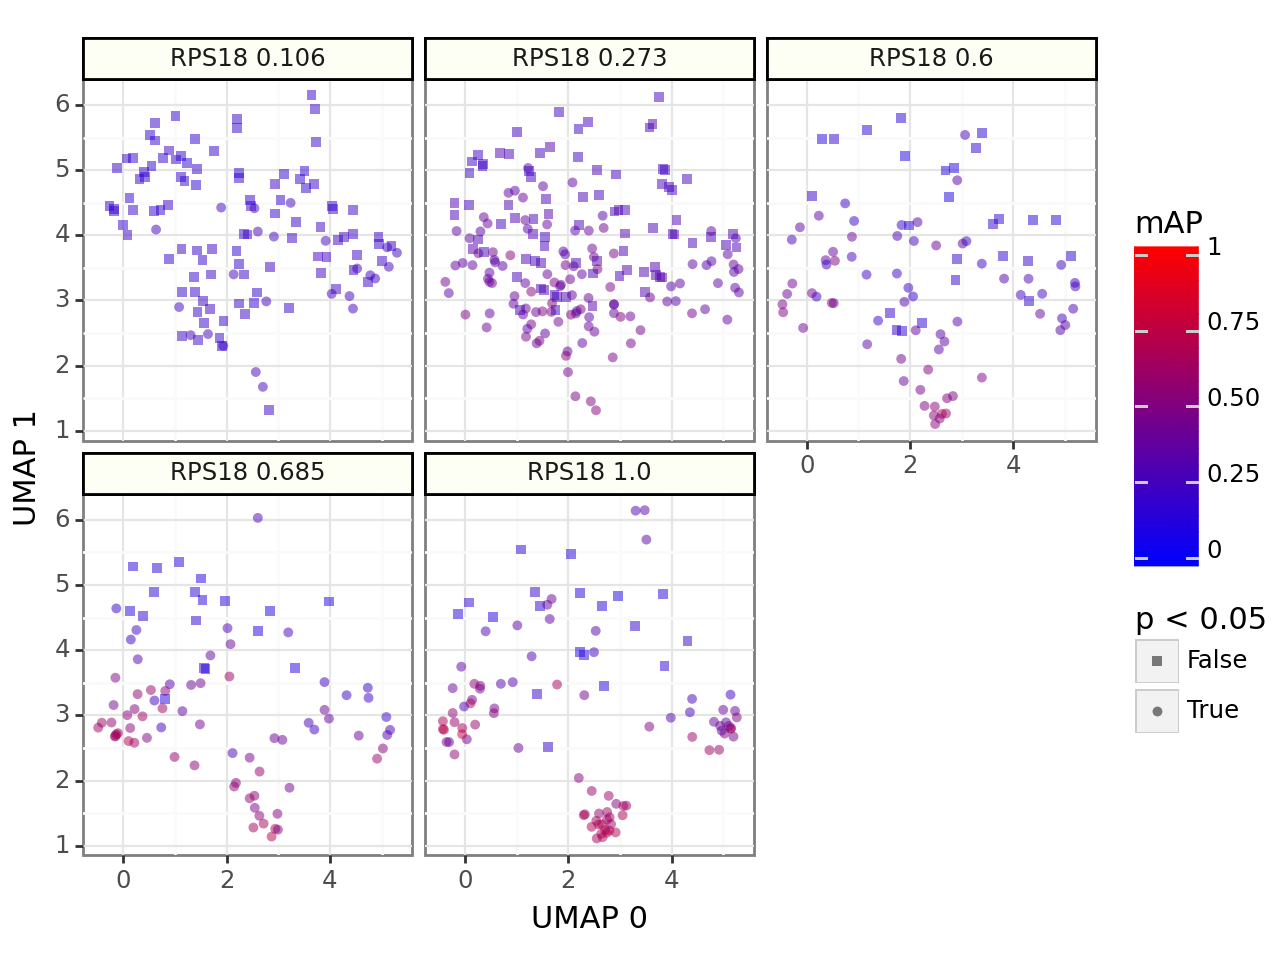

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_SEC61A1_singlecell_umap_map.png


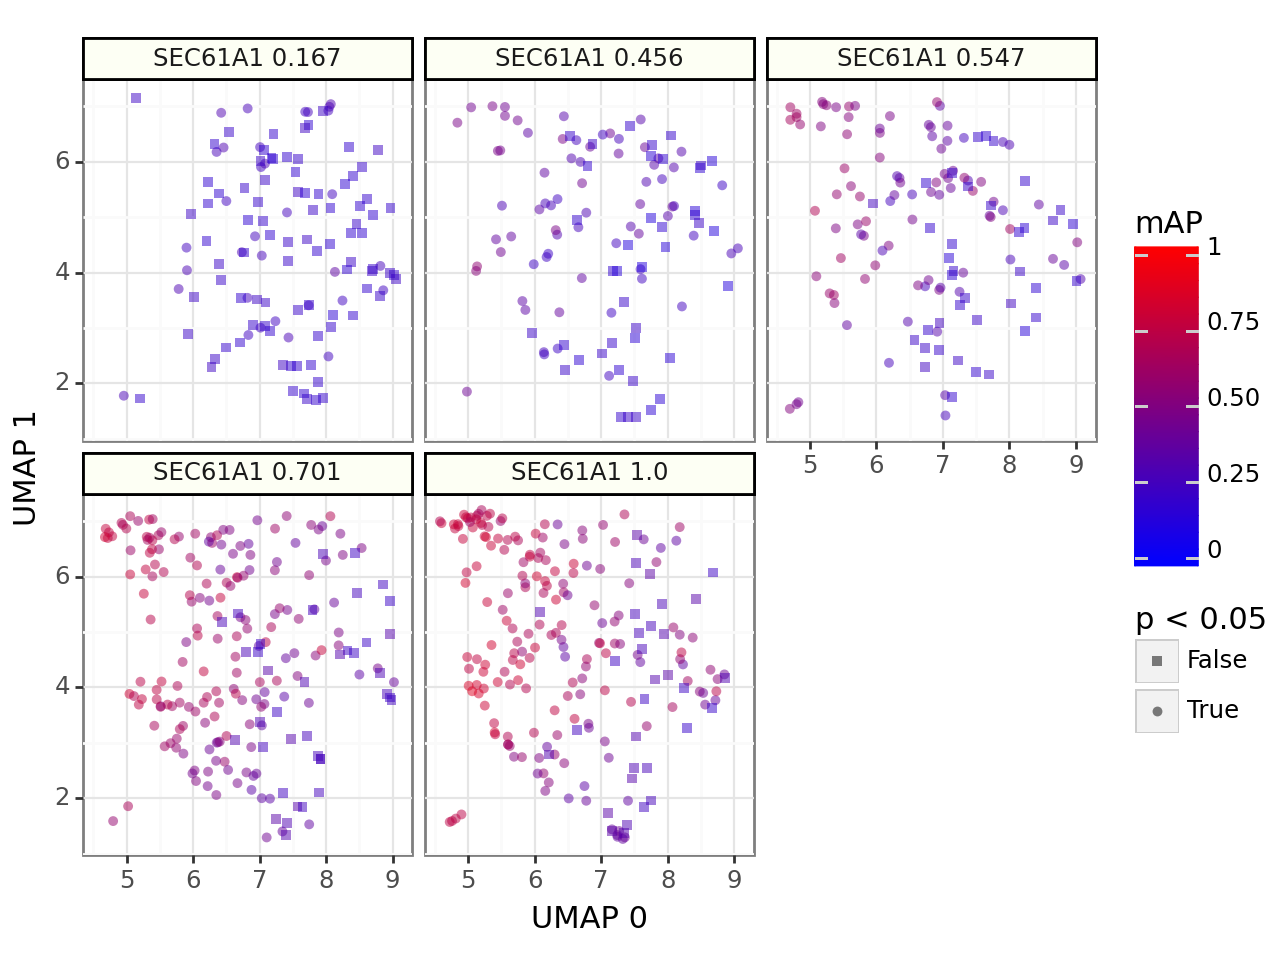

/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 5 in image.
/dgx1nas1/storage/data/akalinin/miniconda3/envs/map_benchmark/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_TUBB_singlecell_umap_map.png


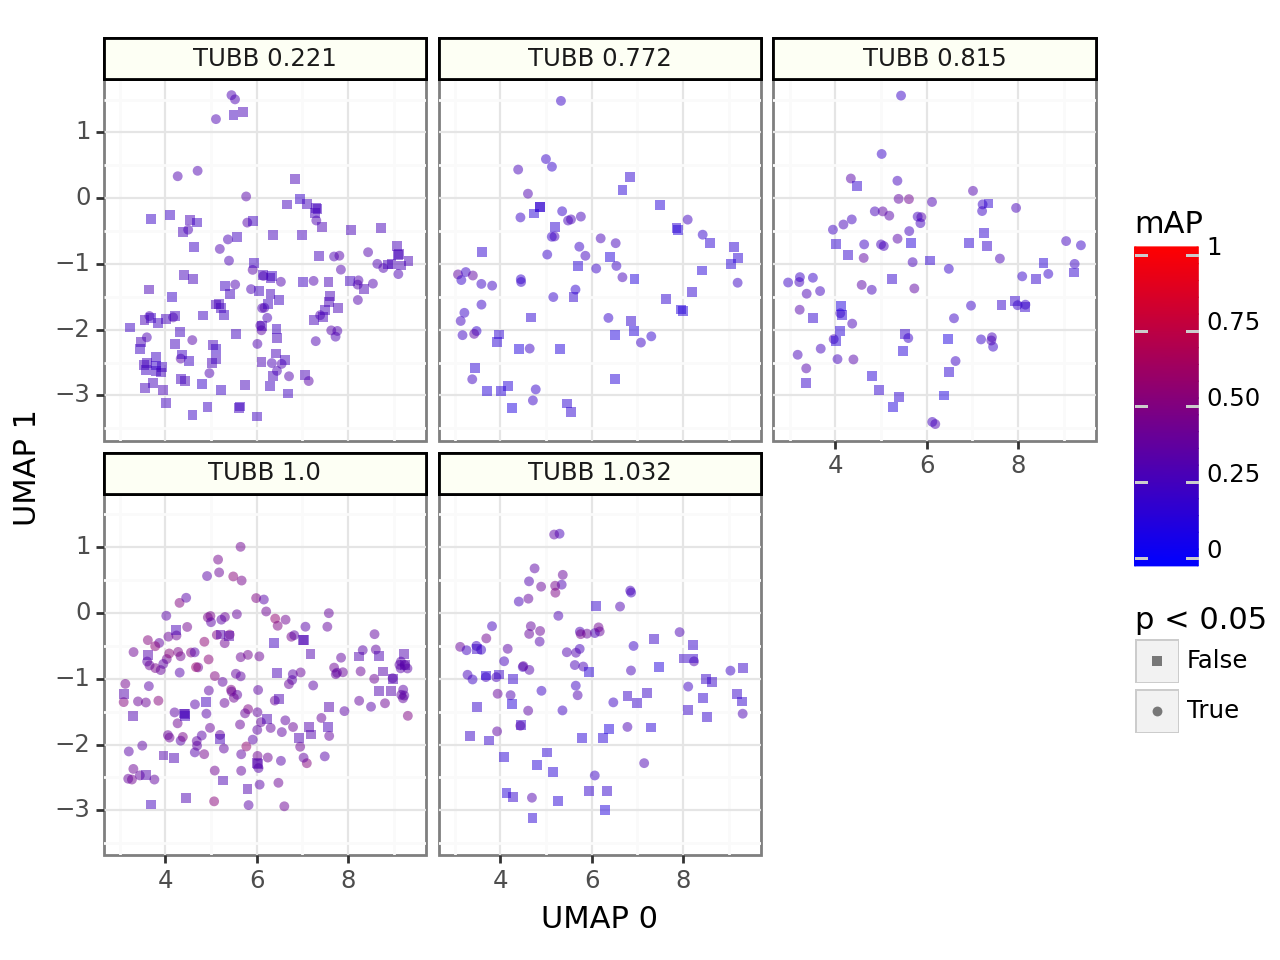

In [12]:
for gene in sc_df.gene.unique():
    if gene in ["neg", "*", "nan", np.nan]:
        continue

    gene_embedding_df = sc_df.query("map_gene == @gene")

    gene_embedding_df = gene_embedding_df.assign(
        map_facet_label=(
            gene_embedding_df.map_gene
            + " "
            + gene_embedding_df.relative_activity_day5.round(3).astype(str)
        )
    )

    gene_embedding_df.loc[
        gene_embedding_df.Metadata_gene_identity == "neg", "map_facet_label"
    ] = "Negative Ctrl"
    facet_order = ["Negative Ctrl"] + [
        f"{gene_embedding_df.map_gene.unique()[0]} " + str(x)
        for x in sorted(
            gene_embedding_df.relative_activity_day5.dropna().unique().round(3)
        )
    ]
    gene_embedding_df.loc[:, "map_facet_label"] = pd.Categorical(
        gene_embedding_df.map_facet_label, categories=facet_order
    )

    gene_gg = (
        gg.ggplot(
            gene_embedding_df.dropna(subset=["map_facet_label"]),
            gg.aes(x="umap_0", y="umap_1"),
        )
        + gg.geom_point(
            gg.aes(color="mAP", shape="p < 0.05"), size=2, stroke=0, alpha=0.5
        )
        + gg.facet_wrap("~map_facet_label")
        + gg.theme_bw()
        + gg.xlab("UMAP 0")
        + gg.ylab("UMAP 1")
        + gg.theme(strip_background=gg.element_rect(colour="black", fill="#fdfff4"))
        + gg.scale_color_gradient(low="blue", high="red", limits=[0, 1])
        + gg.scale_shape_manual(values={False: "s", True: "o"})
    )

    output_file = pathlib.Path(
        f"{output_dir}/gene_umaps/{gse_id}_{gene}_singlecell_umap_map.png"
    )
    gene_gg.save(output_file, dpi=500, height=5, width=6)
    print(gene_gg)